### Ejercicio final para clase de ML

- Se plantea un caso para evaluar posteos de internet, como variable objetivo se prentende definidir si un posteo sera exitoso o no, para ello se cuenta con un dataset de posteos y variables predictoras

 - La variable objetivo esta relacionada a la cantidad de visitas del posteo, si un posteo recibe mas de 2000 visitas es considerado exitoso de lo contrario se lo considerara no existoso.

Puntos relevantes:

- Se debe realizar un analisis exploratorio de los datos, para ello se debe realizar un analisis de los datos faltantes, outliers, distribuciones, etc.
- Se debe explicar el proceso paso a paso de la solucion del problema.
- Se deben comparar diferentes modelos de clasificacion, para ello se debe realizar un analisis de los resultados obtenidos.


In [2]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Load dataset

- Se carga el dataset de posteos de internet, dado como archivo .csv.

In [38]:
# load data
df = pd.read_csv('../src/data/raw/train.csv', sep=';') 

print(f"The Dataframe shape is: {df.shape}, so we have {df.shape[0]} rows and {df.shape[1]} columns.")

#checking the first 5 rows
print(f"The first 5 rows are:")

df.head(5)

The Dataframe shape is: (13186, 34), so we have 13186 rows and 34 columns.
The first 5 rows are:


ID  days_diff  number_words_title  number_words_content  \
0   1        731                  11                  1089   
1   2        731                  12                   682   
2   3        731                   8                   397   
3   4        731                   5                   356   
4   5        731                   6                   174   

   number_unique_words  number_no_stopwords  number_no_stopwords_unique  \
0             0.418692                  1.0                    0.553468   
1             0.459542                  1.0                    0.634961   
2             0.624679                  1.0                    0.805668   
3             0.618234                  1.0                    0.766234   
4             0.691860                  1.0                    0.902913   

   number_links  number_images  number_videos  ...  \
0            20             20              0  ...   
1            10              1              0  ...   
2            11              1              0  ...   
3             3             12              1  ...   
4             0              1              0  ...   

   maximum_bias_positive_words  average_bias_negative_words  \
0                          1.0                    -0.231548   
1                          0.6                    -0.220150   
2                          1.0                    -0.144643   
3                          1.0                    -0.372619   
4                          0.6                     0.000000   

   minimum_bias_negative_words  maximum_bias_negative_words  \
0                         -0.5                    -0.050000   
1                         -0.6                    -0.050000   
2                         -0.2                    -0.100000   
3                         -0.7                    -0.071429   
4                          0.0                     0.000000   

   subjectivity_title  sentiment_title  abs_title_sentiment_polarity  weekday  \
0            0.000000         0.000000                      0.000000   monday   
1            0.750000        -0.250000                      0.250000   monday   
2            0.000000         0.000000                      0.000000   monday   
3            0.454545         0.136364                      0.136364   monday   
4            0.000000         0.000000                      0.000000   monday   

        category  views  
0           tech   1200  
1          world   1600  
2            bus   3100  
3  entertainment    631  
4           tech    401  

[5 rows x 34 columns]

## Exploratory Data Analysis and Preprocessing

1 - Check missing values

2 - Check data types

3 - Detect numerical and categorical variables

4 - Analyze and Preprocessing numerical variables

5 - Analyze and Preprocessing categorical variables

6 - Analyze and Preprocessing the target variable

7 - Save the preprocessed dataset




### 1 - Check missing values

In [39]:
#printing the number of missing values per column in a table format
tmp = pd.DataFrame(df.isnull().sum())
tmp.columns = ['Missing values']
print(f"the total number of missing values is: {tmp['Missing values'].sum()}")
print(f"The number of missing values per column is:")
tmp.T

the total number of missing values is: 0
The number of missing values per column is:


ID  days_diff  number_words_title  number_words_content  \
Missing values   0          0                   0                     0   

                number_unique_words  number_no_stopwords  \
Missing values                    0                    0   

                number_no_stopwords_unique  number_links  number_images  \
Missing values                           0             0              0   

                number_videos  ...  maximum_bias_positive_words  \
Missing values              0  ...                            0   

                average_bias_negative_words  minimum_bias_negative_words  \
Missing values                            0                            0   

                maximum_bias_negative_words  subjectivity_title  \
Missing values                            0                   0   

                sentiment_title  abs_title_sentiment_polarity  weekday  \
Missing values                0                             0        0   

                category  views  
Missing values         0      0  

[1 rows x 34 columns]

There is no missing values in dataset

### 2 - Check data types

In [40]:
print(f"The Data Type per columns are:")
tmp = pd.DataFrame(df.dtypes)
tmp.columns = ['Data Type']
tmp.T

The Data Type per columns are:


ID days_diff number_words_title number_words_content  \
Data Type  int64     int64              int64                int64   

          number_unique_words number_no_stopwords number_no_stopwords_unique  \
Data Type             float64             float64                    float64   

          number_links number_images number_videos  ...  \
Data Type        int64         int64         int64  ...   

          maximum_bias_positive_words average_bias_negative_words  \
Data Type                     float64                     float64   

          minimum_bias_negative_words maximum_bias_negative_words  \
Data Type                     float64                     float64   

          subjectivity_title sentiment_title abs_title_sentiment_polarity  \
Data Type            float64         float64                      float64   

          weekday category  views  
Data Type  object   object  int64  

[1 rows x 34 columns]

In [41]:
#grouping by dtype and counting
print(f"The number of variables per Data Type are:")
tmp2 = tmp.groupby('Data Type').size()
tmp2


The number of variables per Data Type are:


Data Type
int64       9
float64    23
object      2
dtype: int64

### 3 - Detect numerical and categorical variables

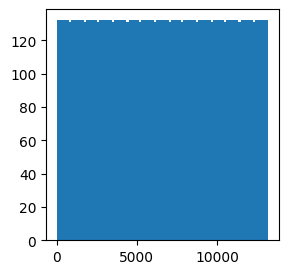

In [8]:
# - Checking if the id column has no important information

#set the figure size
plt.figure(figsize=(3, 3))
plt.hist(df['ID'], bins=100)
plt.show()

In [42]:
import re

# define target column, and retrieve list of attributes from the dataframe
id_cols = ['ID'] #If the dataset has an ID column, it should be included here because it will not be used in the model
target_col = 'views'
categ_cols = [] #If the dataset has known categorical columns, they should be included here
other_cols = [] #If the dataset has other columns that should not be included in the model, they should be included here

feature_cols = [x for x in df.columns.tolist() if x not in id_cols + other_cols + [target_col]]

numeric_features = [x for x in feature_cols if df[x].dtype != 'object' and not re.match('(^has_)', x) and x not in categ_cols]

categorical_features = [x for x in feature_cols if x not in numeric_features]

# check feature columns
print("Description of the feature columns: \n")
print('Number of feature cols: {}'.format(len(feature_cols)))
print('Number of categoric features: {}'.format(len(categorical_features)))
print('Number of numeric features: {} \n'.format(len(numeric_features)))
print('The numeric features are: \n {} \n'.format(numeric_features))
print('The categorical features are: \n {}'.format(categorical_features))

Description of the feature columns: 

Number of feature cols: 32
Number of categoric features: 2
Number of numeric features: 30 

The numeric features are: 
 ['days_diff', 'number_words_title', 'number_words_content', 'number_unique_words', 'number_no_stopwords', 'number_no_stopwords_unique', 'number_links', 'number_images', 'number_videos', 'average_word_length', 'number_of_keywords', 'score_topic_1', 'score_topic_2', 'score_topic_3', 'score_topic_4', 'score_topic_5', 'degree_of_subjectivity', 'degree_of_sentiment', 'pct_positive_words', 'pct_negative_words', 'pct_positive_words_over_sentiment_words', 'average_bias_positive_words', 'minimum_bias_positive_words', 'maximum_bias_positive_words', 'average_bias_negative_words', 'minimum_bias_negative_words', 'maximum_bias_negative_words', 'subjectivity_title', 'sentiment_title', 'abs_title_sentiment_polarity'] 

The categorical features are: 
 ['weekday', 'category']


### 4 - Analyze and Preprocessing numerical variables

In [10]:
print("Description of the numerical columns:")

df[numeric_features].describe().T

Description of the numerical columns:


count        mean         std  \
days_diff                                13186.0  593.432504   82.812932   
number_words_title                       13186.0    9.814879    1.964785   
number_words_content                     13186.0  501.993554  421.588436   
number_unique_words                      13186.0    0.558257    0.118062   
number_no_stopwords                      13186.0    0.992340    0.087187   
number_no_stopwords_unique               13186.0    0.700876    0.120197   
number_links                             13186.0   10.531473   10.548145   
number_images                            13186.0    3.875626    7.889616   
number_videos                            13186.0    1.208099    4.264581   
average_word_length                      13186.0    4.631731    0.493426   
number_of_keywords                       13186.0    7.261338    1.882588   
score_topic_1                            13186.0    0.201239    0.273693   
score_topic_2                            13186.0    0.144670    0.223856   
score_topic_3                            13186.0    0.172065    0.254470   
score_topic_4                            13186.0    0.212297    0.288919   
score_topic_5                            13186.0    0.269729    0.310928   
degree_of_subjectivity                   13186.0    0.456369    0.095268   
degree_of_sentiment                      13186.0    0.135322    0.097073   
pct_positive_words                       13186.0    0.043574    0.016969   
pct_negative_words                       13186.0    0.016550    0.011237   
pct_positive_words_over_sentiment_words  13186.0    0.720633    0.160752   
average_bias_positive_words              13186.0    0.364346    0.090460   
minimum_bias_positive_words              13186.0    0.098821    0.071462   
maximum_bias_positive_words              13186.0    0.775980    0.224345   
average_bias_negative_words              13186.0   -0.257300    0.127255   
minimum_bias_negative_words              13186.0   -0.494953    0.277565   
maximum_bias_negative_words              13186.0   -0.113840    0.099813   
subjectivity_title                       13186.0    0.274251    0.321902   
sentiment_title                          13186.0    0.082086    0.260973   
abs_title_sentiment_polarity             13186.0    0.153719    0.226306   

                                                min         25%         50%  \
days_diff                                449.000000  521.000000  595.000000   
number_words_title                         2.000000    8.000000   10.000000   
number_words_content                       0.000000  228.000000  372.000000   
number_unique_words                        0.000000    0.486147    0.558198   
number_no_stopwords                        0.000000    1.000000    1.000000   
number_no_stopwords_unique                 0.000000    0.640398    0.706280   
number_links                               0.000000    4.000000    7.000000   
number_images                              0.000000    1.000000    1.000000   
number_videos                              0.000000    0.000000    0.000000   
average_word_length                        0.000000    4.473356    4.644974   
number_of_keywords                         1.000000    6.000000    7.000000   
score_topic_1                              0.018191    0.025077    0.033598   
score_topic_2                              0.018183    0.025019    0.033351   
score_topic_3                              0.018182    0.025035    0.033418   
score_topic_4                              0.018182    0.025116    0.040000   
score_topic_5                              0.018182    0.028593    0.050000   
degree_of_subjectivity                     0.000000    0.404341    0.458171   
degree_of_sentiment                       -0.393750    0.078130    0.134722   
pct_positive_words                         0.000000    0.032356    0.042440   
pct_negative_words                         0.000000    0.009302    0.014901   
pct_positive_words_over_sen

Histograms for each numeric feature where the target is 0 in blue and 1 in red


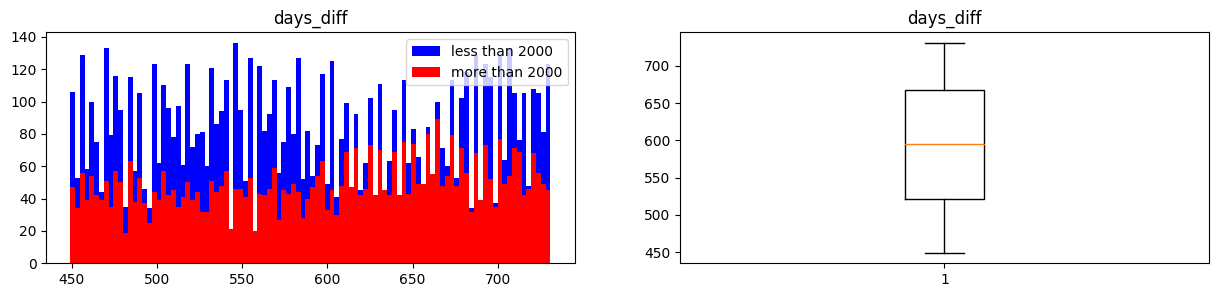

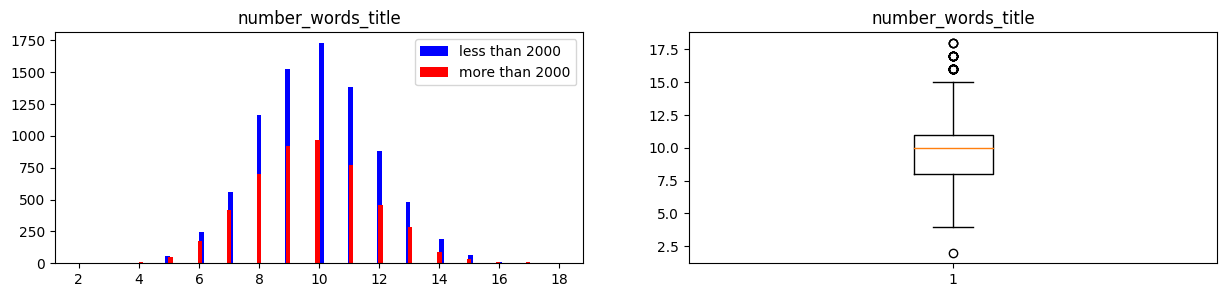

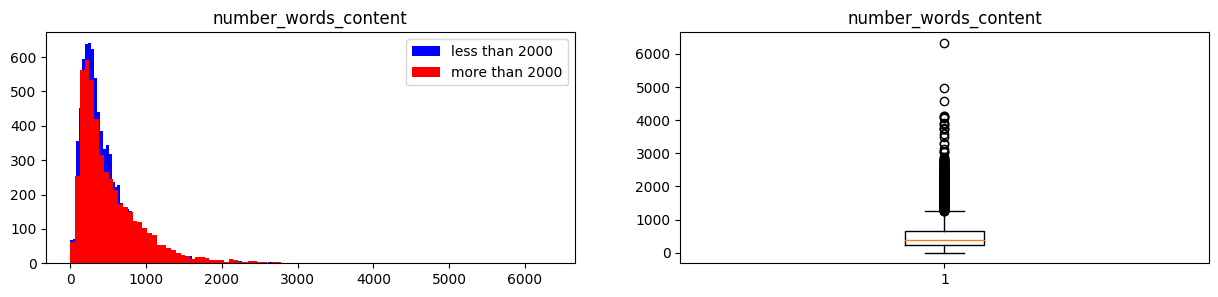

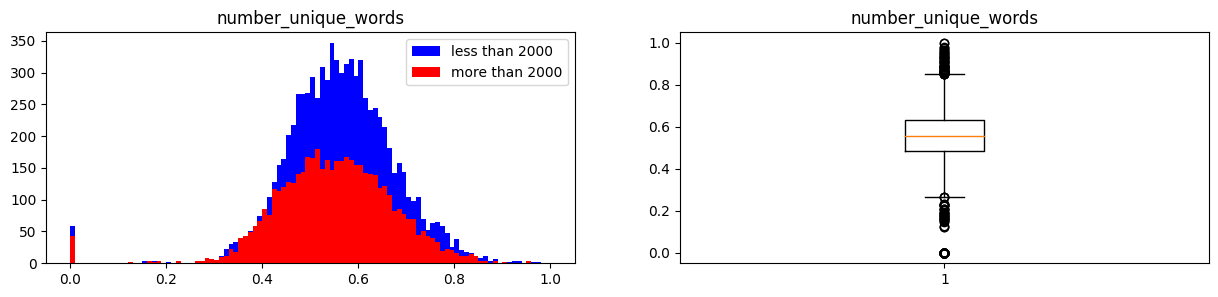

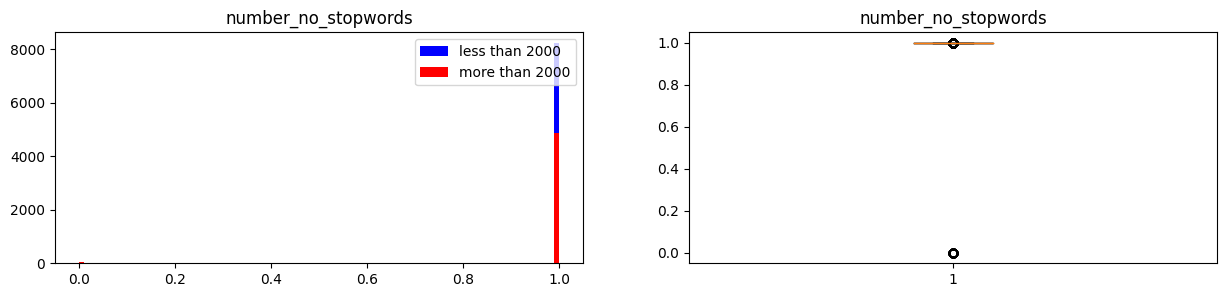

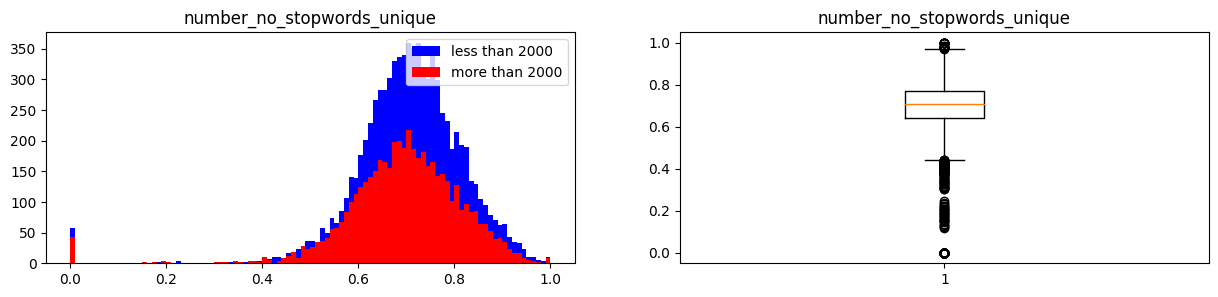

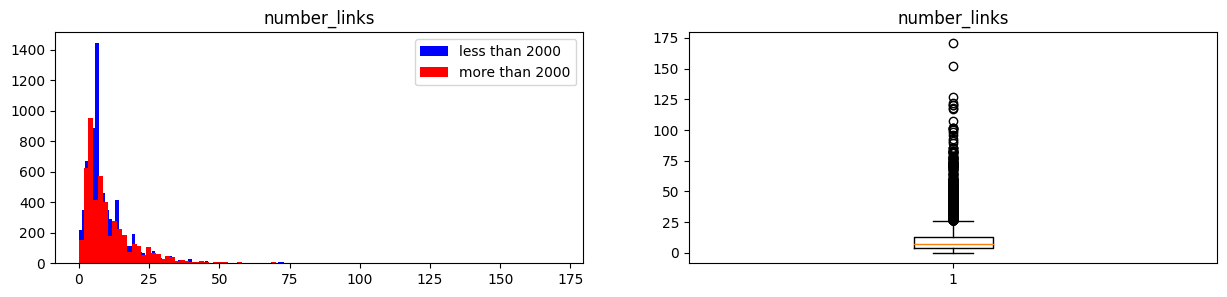

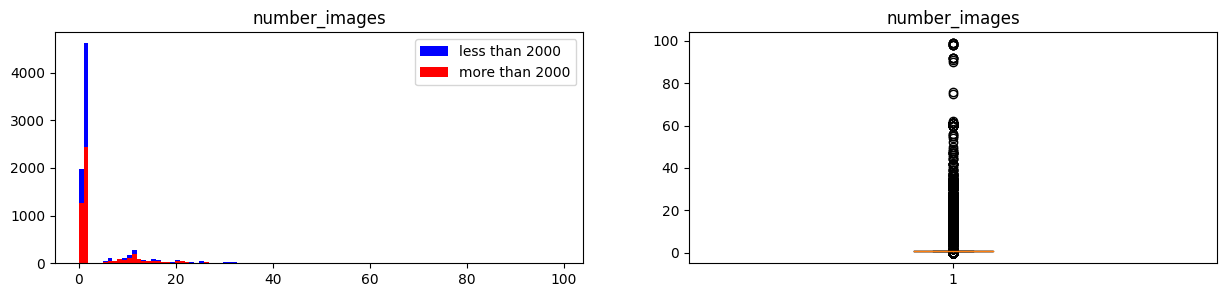

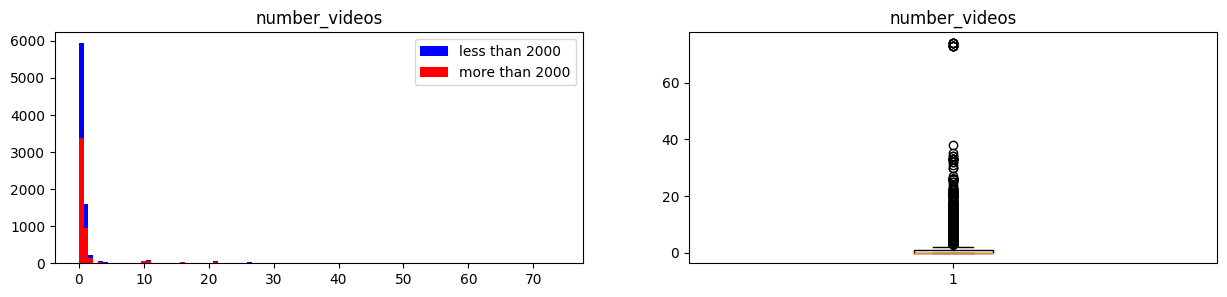

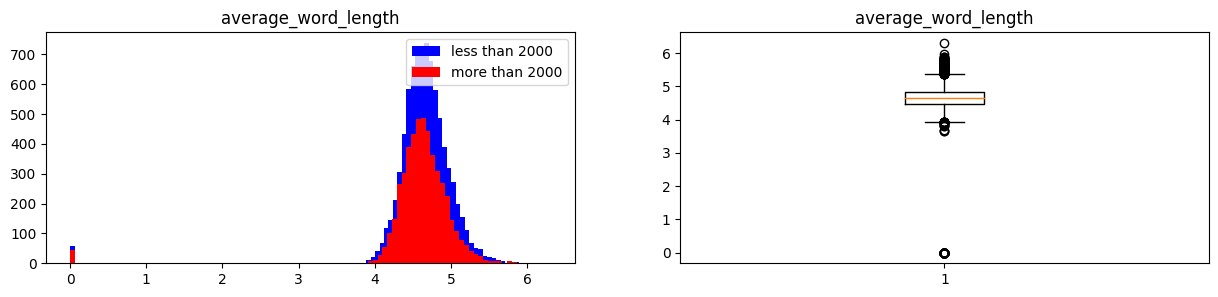

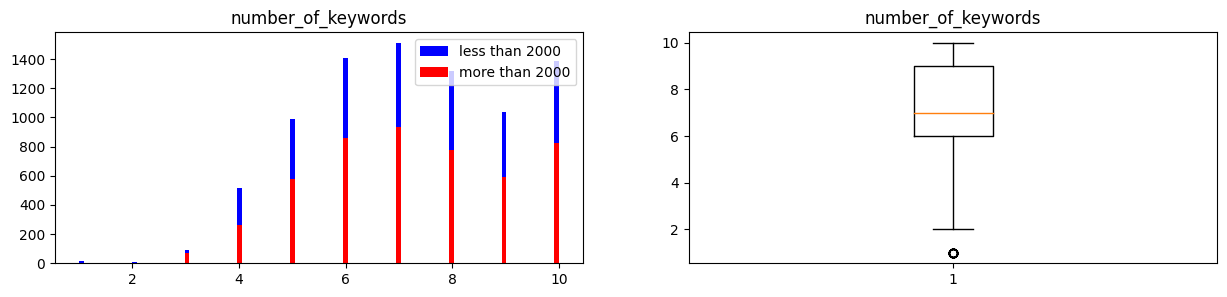

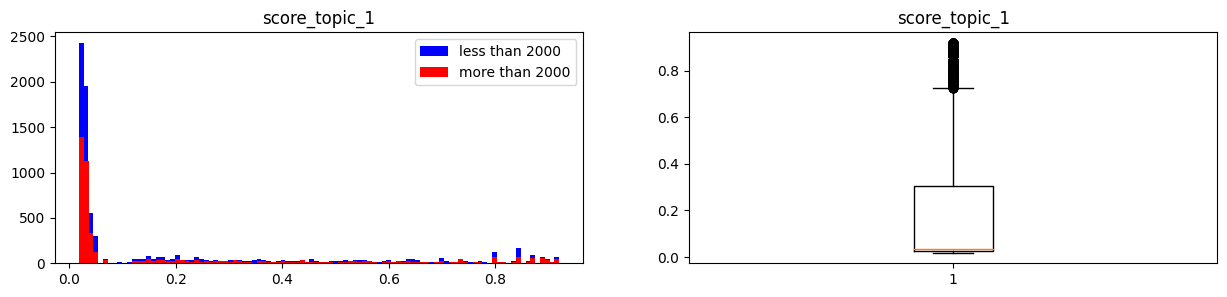

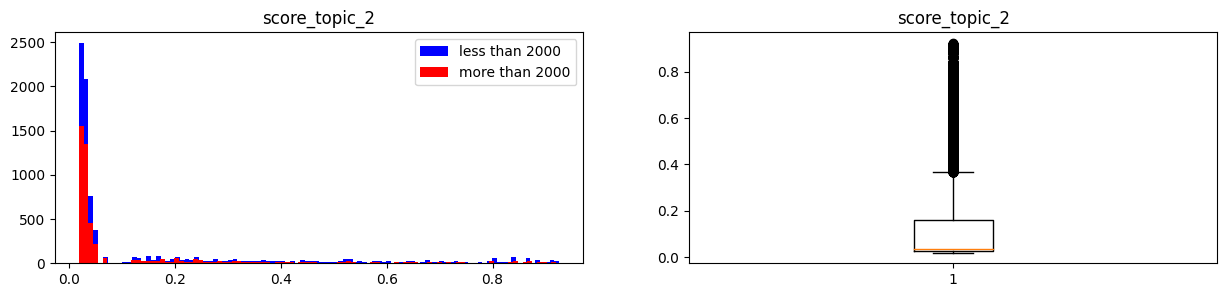

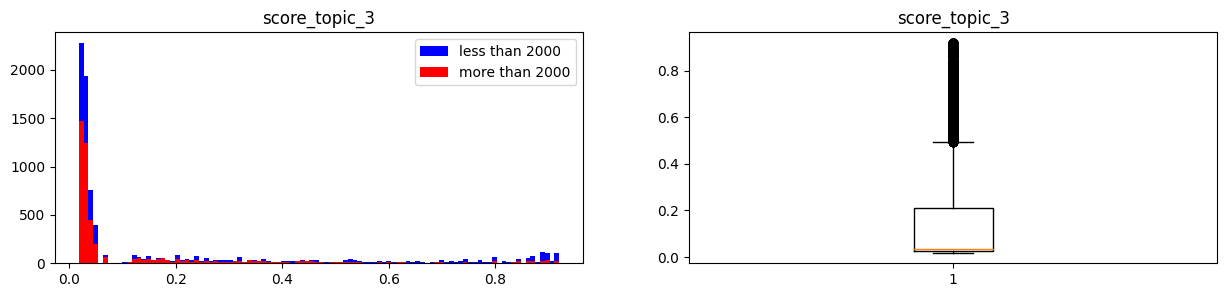

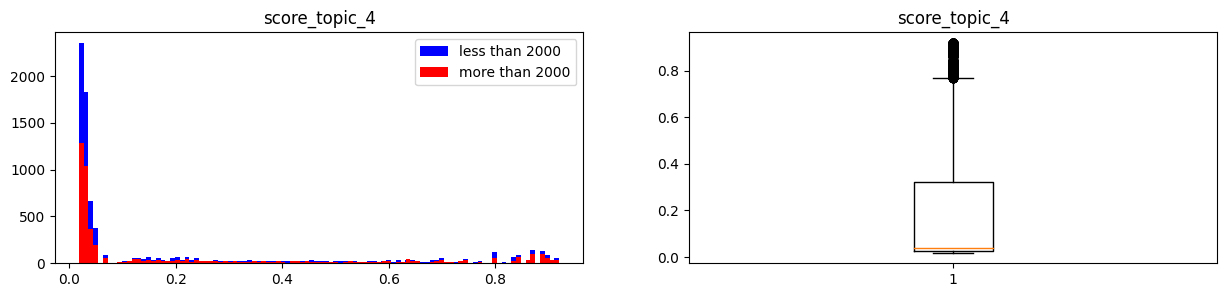

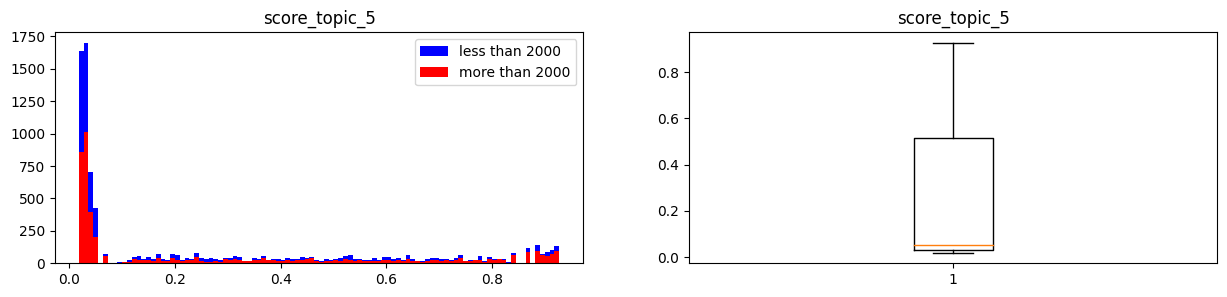

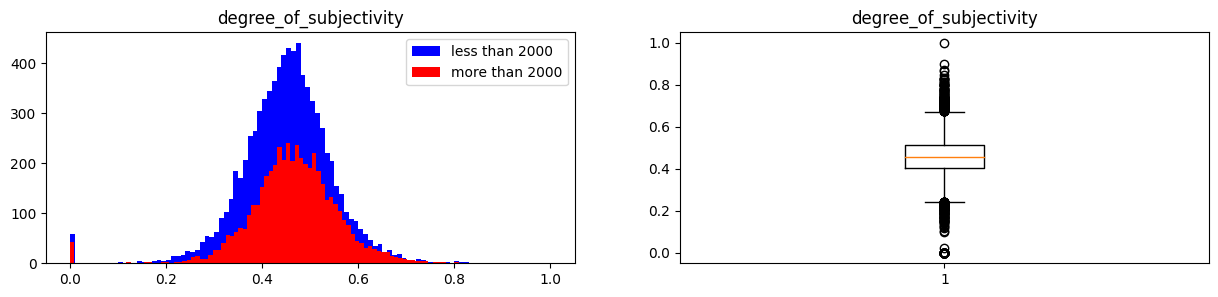

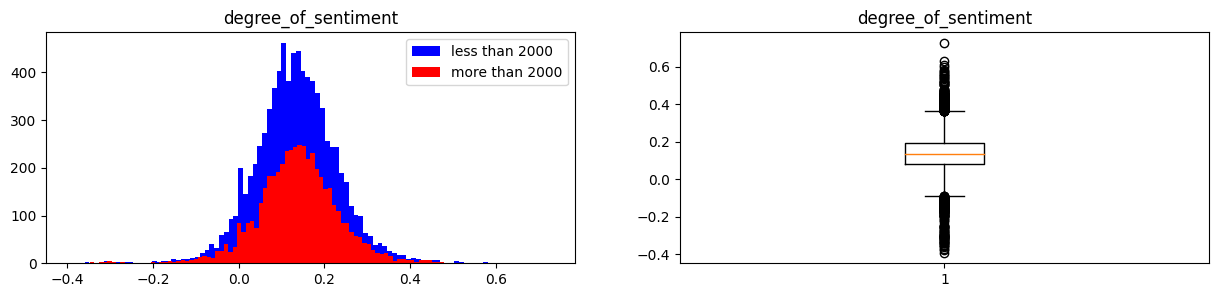

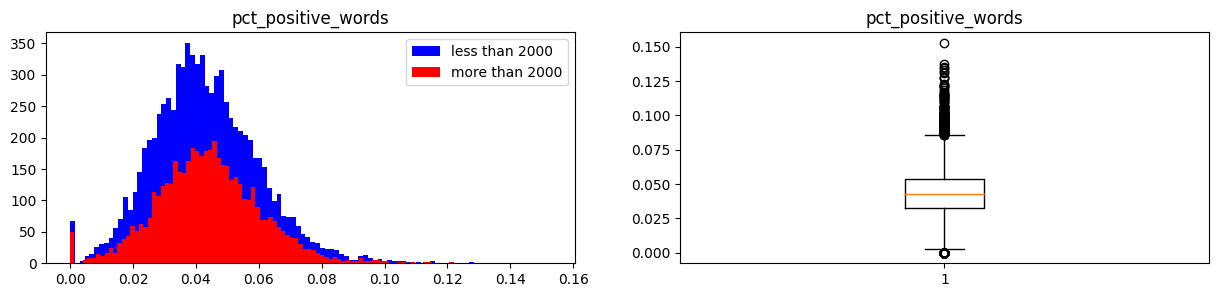

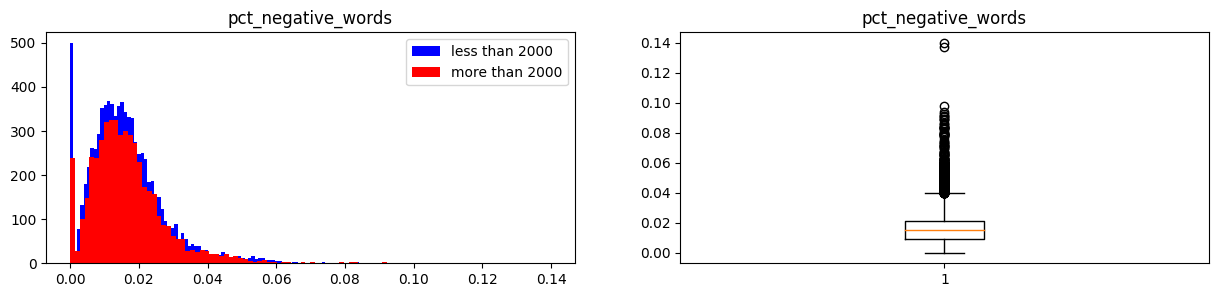

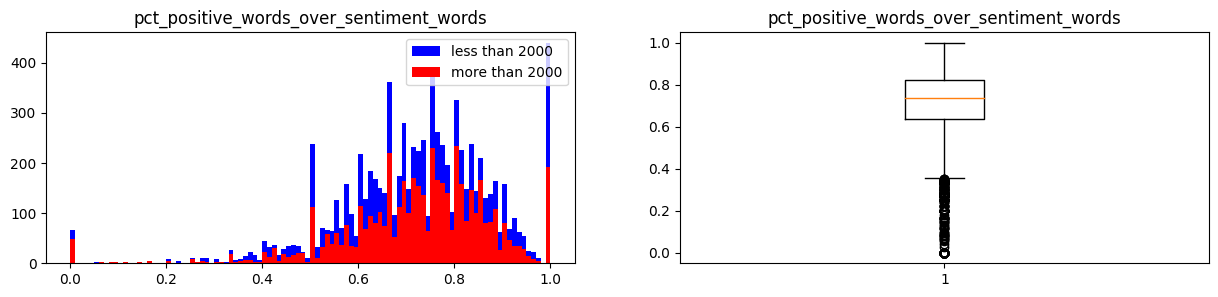

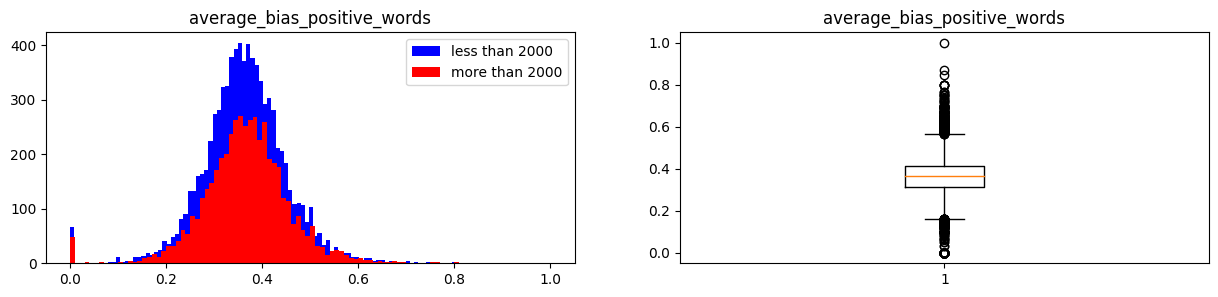

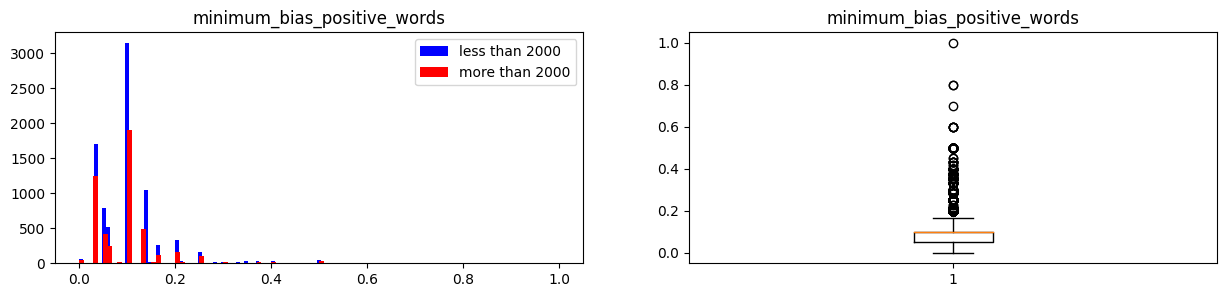

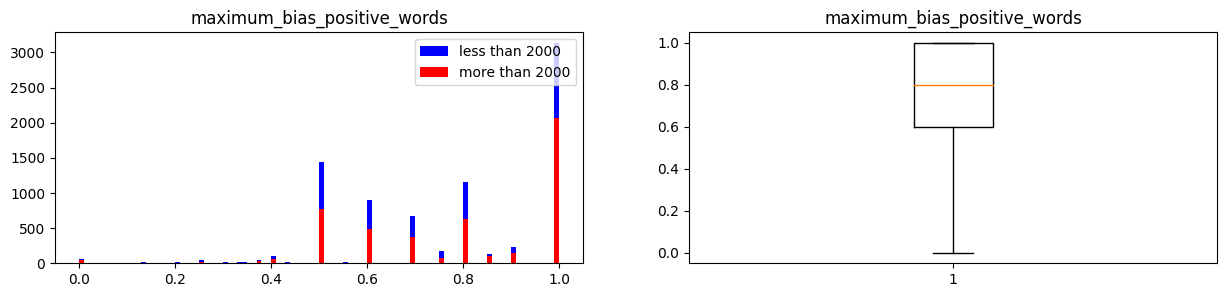

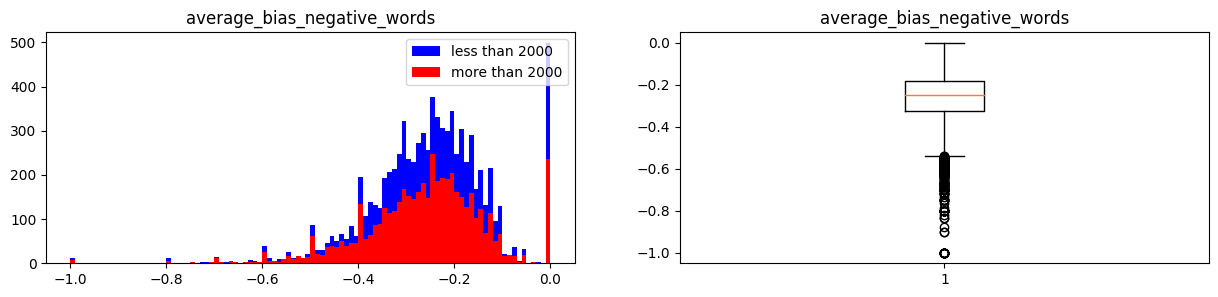

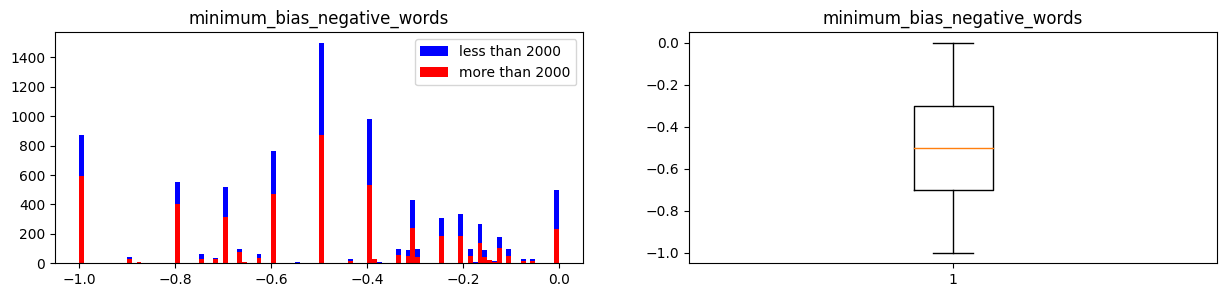

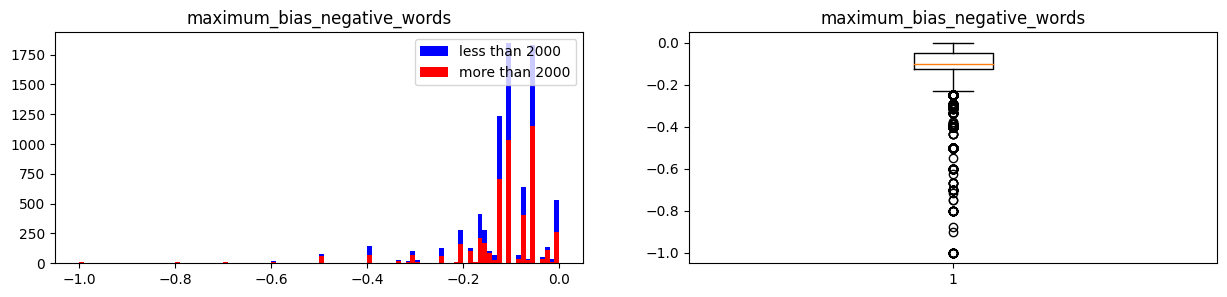

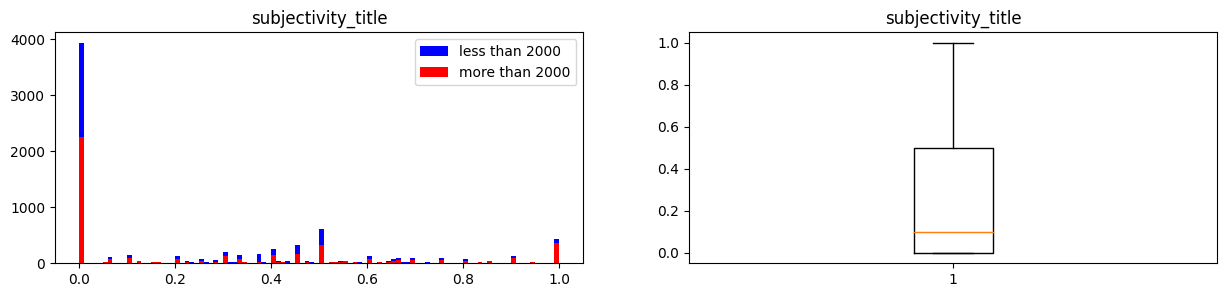

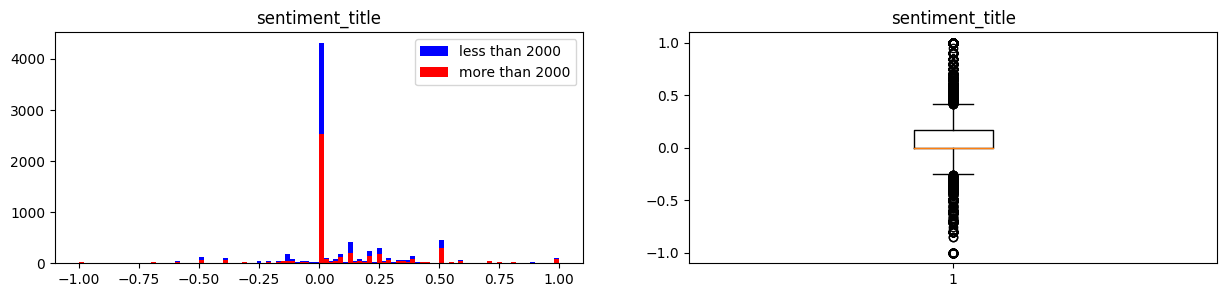

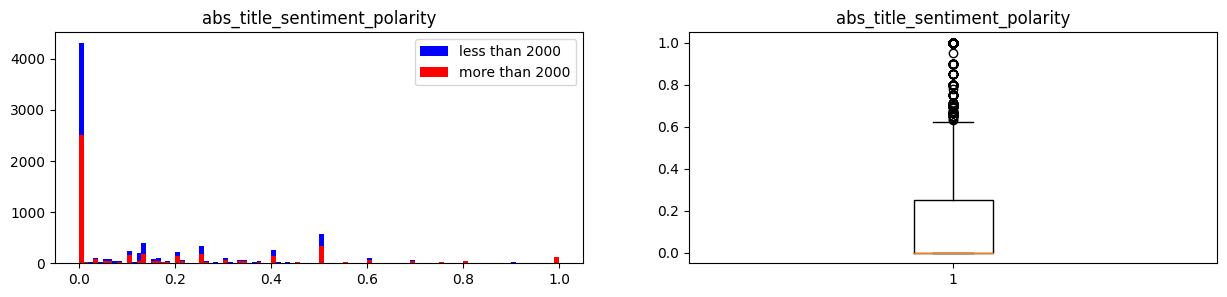

In [43]:
# Histograms for each numeric features
%matplotlib inline
# hist = df[numeric_features].hist(bins=30, sharey=True, figsize=(22, 22))
print("Histograms for each numeric feature where the target is 0 in blue and 1 in red")
#create histograms for each numeric feature where the target is 0 in blue and 1 in red
for col in numeric_features:
    #create two subplots for each numeric feature
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))
    #plot the histogram for the first subplot
    ax1.hist(df.loc[df['views'] < 2000, col], bins=100, alpha=1, label='less than 2000', color='blue')
    ax1.hist(df.loc[df['views'] >= 2000, col], bins=100, alpha=1, label='more than 2000' , color='red')
    ax1.legend(loc='upper right')
    ax1.set_title(col)
    #plot the boxplot for the second subplot
    ax2.boxplot(df[col])
    ax2.set_title(col)
    plt.show()

### Removing outliers 

Verify the outliers using the criteria of 3 standard deviations to get 99.7% of the data and the criteria of 2 standard deviations to get 95% of the data


### 1 - using the criteria of 3 standard deviations to get 99.7% of the data

In [44]:
# identify for each numeric feature the 3 std from the mean boundary and the number of outliers

df2 = df.copy()
for col in numeric_features:
    mean = df2[col].mean()
    std = df2[col].std()
    print(f"Feature {col} has a mean of {mean} and a std of {std} ")
    print(f"Values below {mean - 3*std} and above {mean + 3*std} are considered outliers ")
    print(f"Number of outliers for {col} is {df2.loc[(df2[col] < mean - 3*std) | (df2[col] > mean + 3*std), col].count()}")
    #remove outliers
    print(f"Number of rows before removing outliers is {df2.shape[0]}")
    df2 = df2.loc[(df2[col] > mean - 3*std) & (df2[col] < mean + 3*std), :]
    print(f"Number of rows after removing outliers is {df2.shape[0]} \n")


Feature days_diff has a mean of 593.4325041710905 and a std of 82.81293183026902 
Values below 344.9937086802834 and above 841.8712996618976 are considered outliers 
Number of outliers for days_diff is 0
Number of rows before removing outliers is 13186
Number of rows after removing outliers is 13186 

Feature number_words_title has a mean of 9.814879417564082 and a std of 1.9647851754353352 
Values below 3.9205238912580764 and above 15.709234943870088 are considered outliers 
Number of outliers for number_words_title is 35
Number of rows before removing outliers is 13186
Number of rows after removing outliers is 13151 

Feature number_words_content has a mean of 502.07847311991486 and a std of 421.6203089797297 
Values below -762.7824538192742 and above 1766.939400059104 are considered outliers 
Number of outliers for number_words_content is 250
Number of rows before removing outliers is 13151
Number of rows after removing outliers is 12901 

Feature number_unique_words has a mean of 0

Comparison of the histograms for each numeric feature with and without outliers


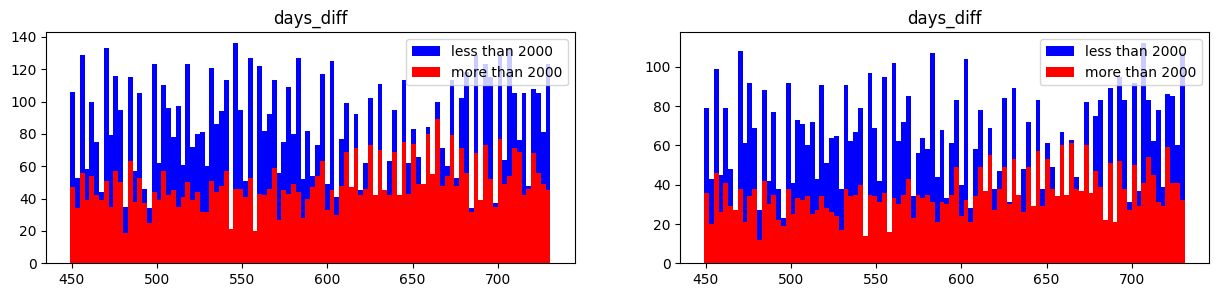

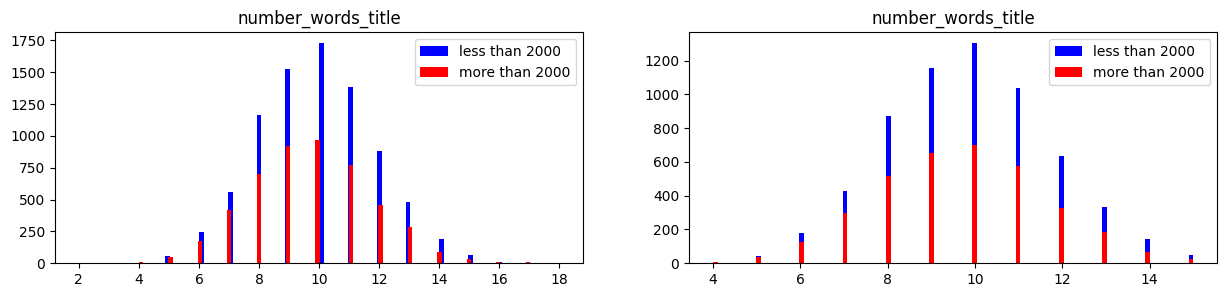

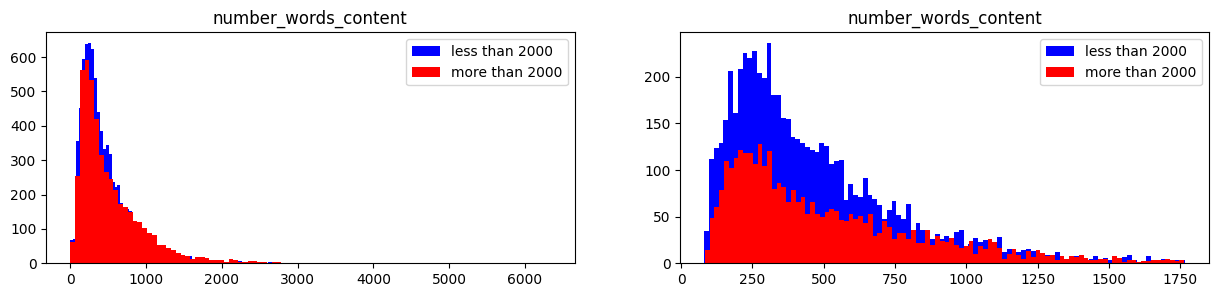

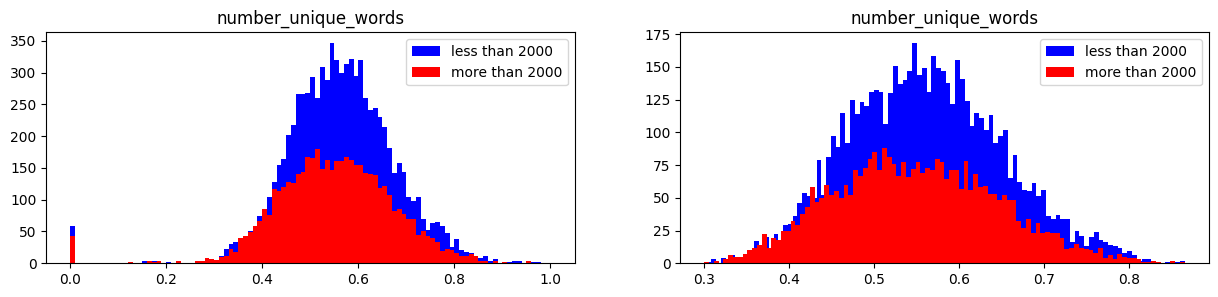

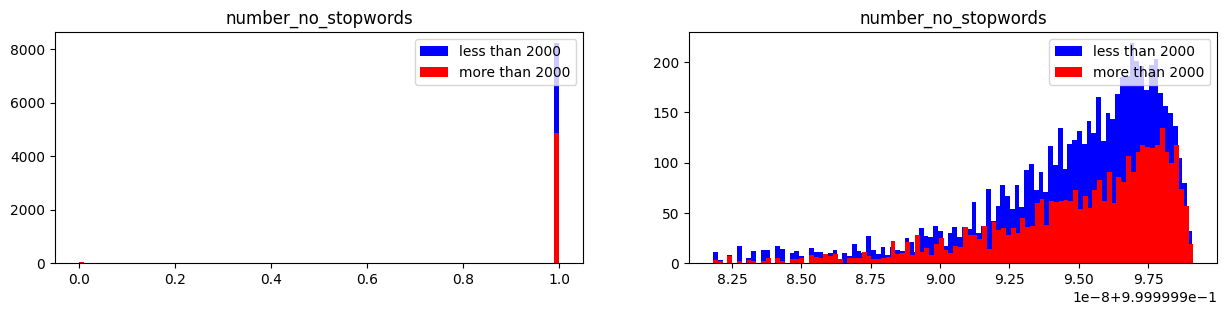

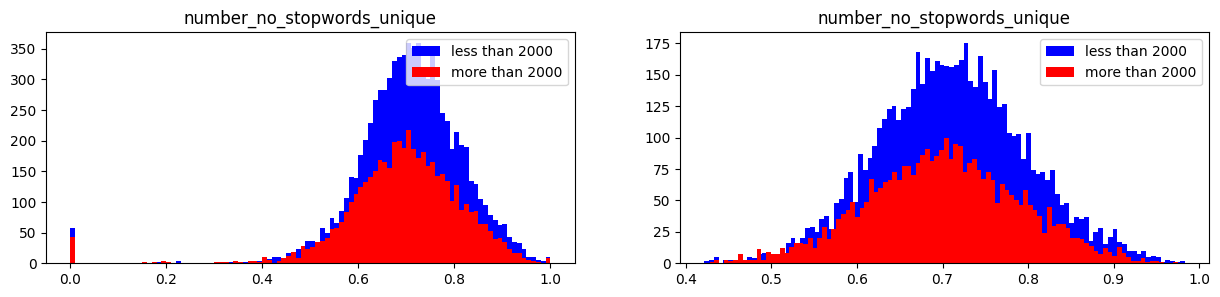

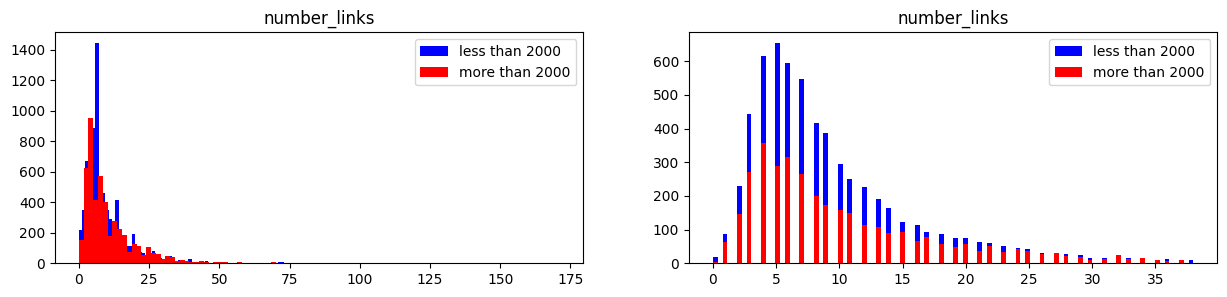

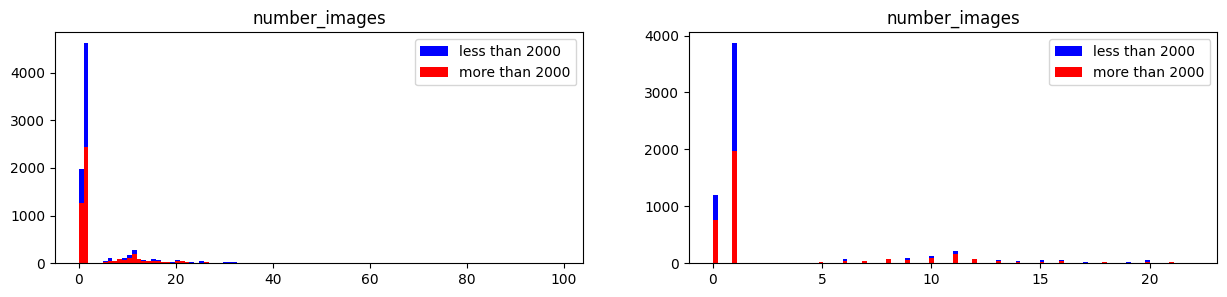

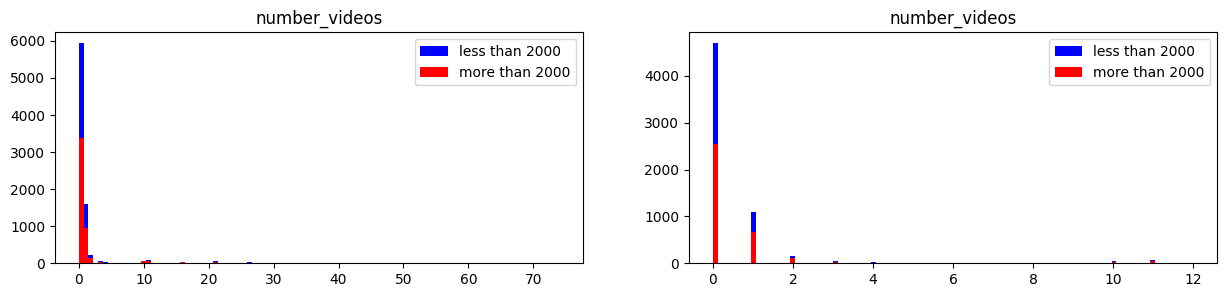

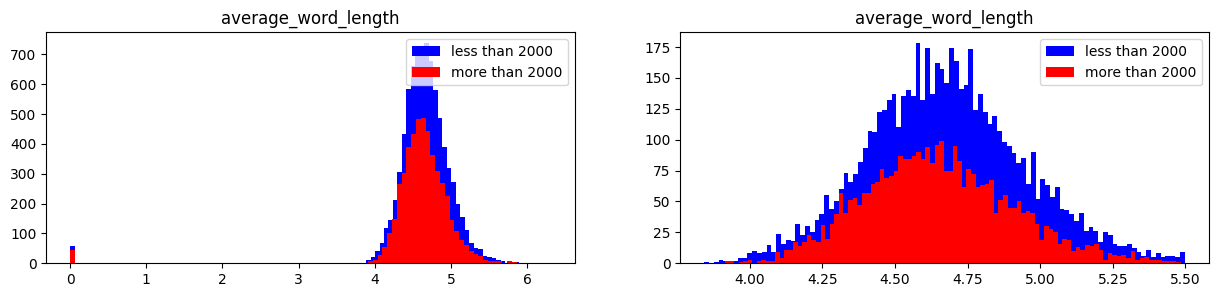

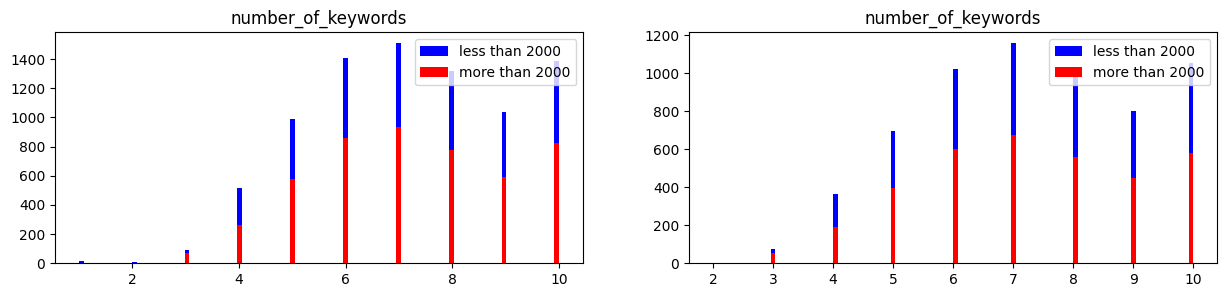

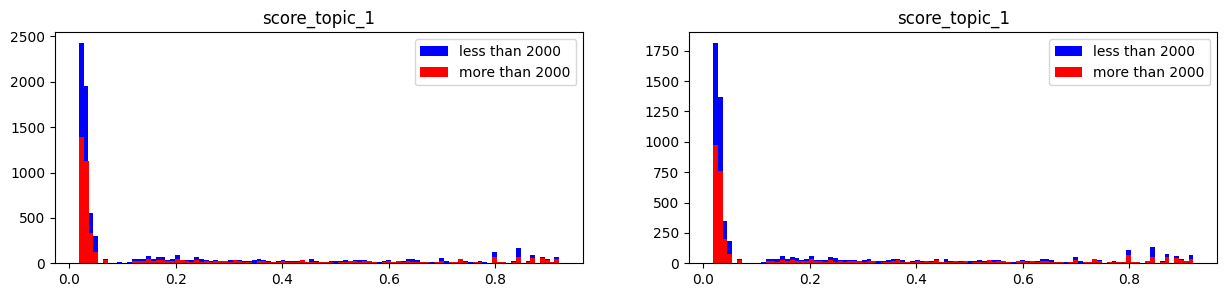

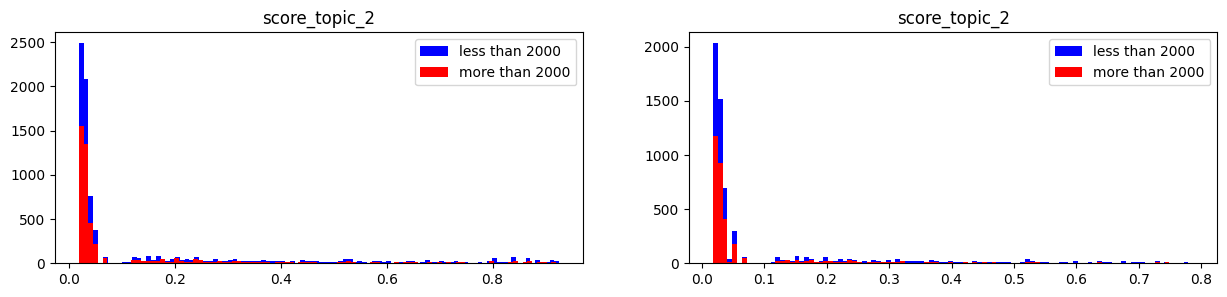

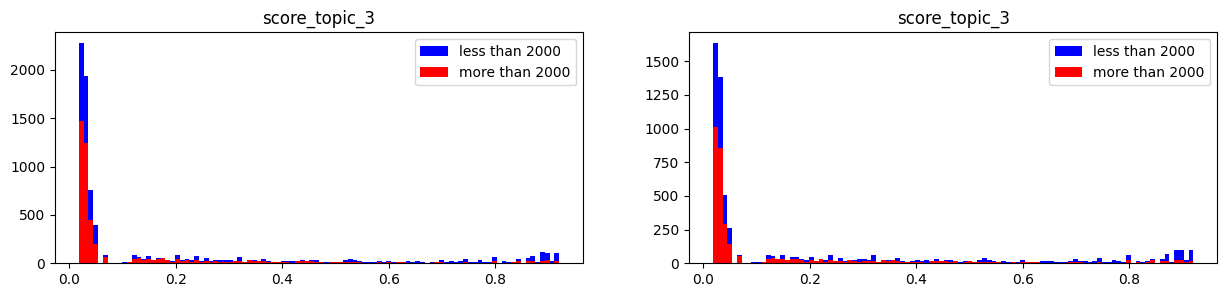

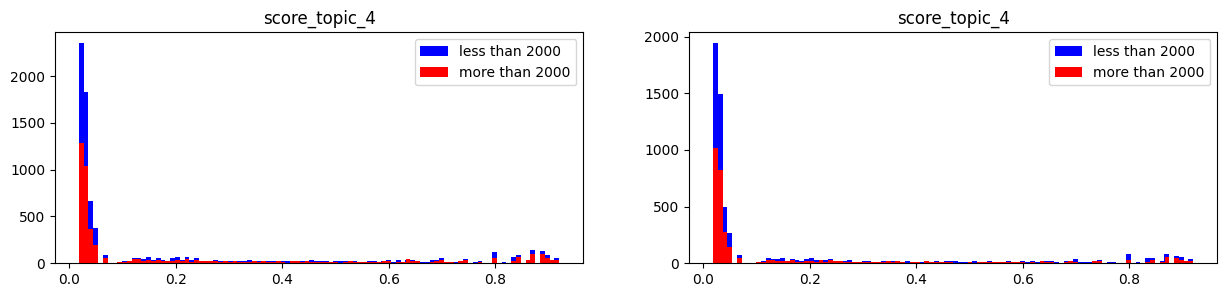

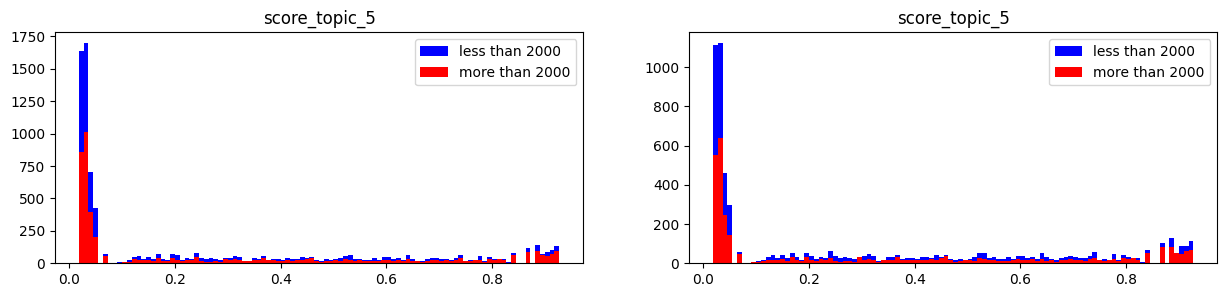

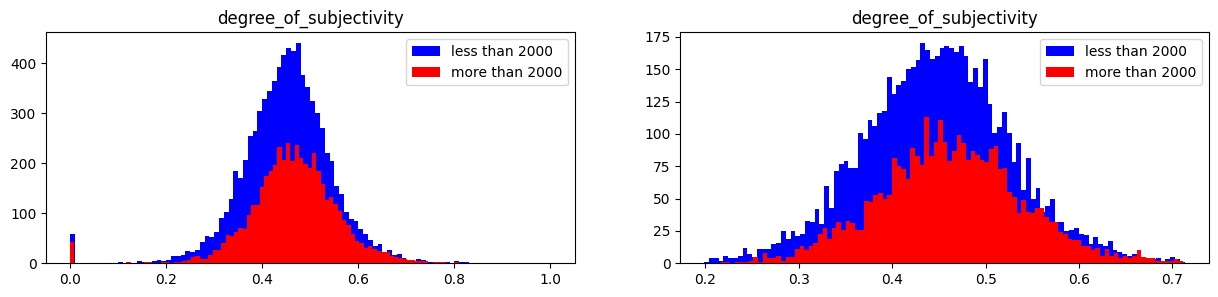

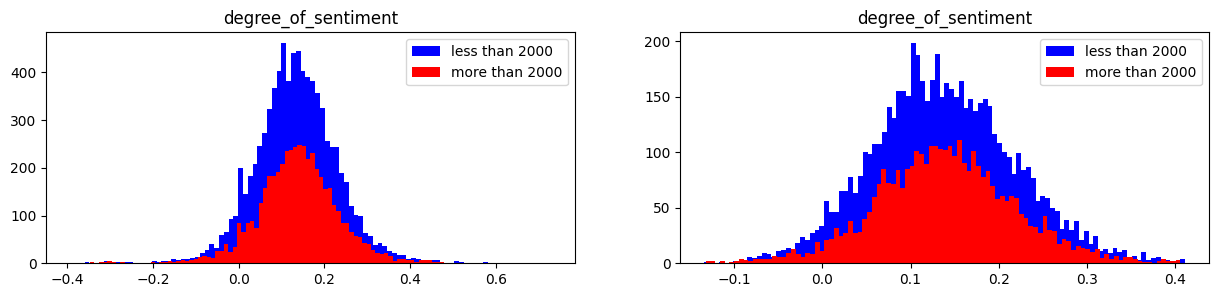

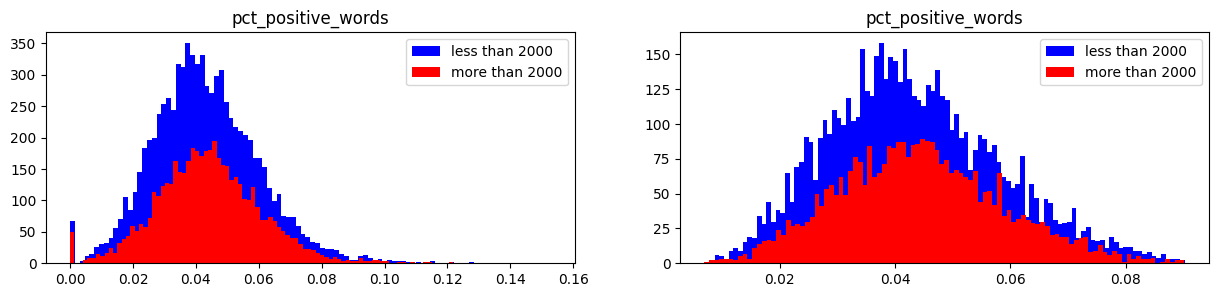

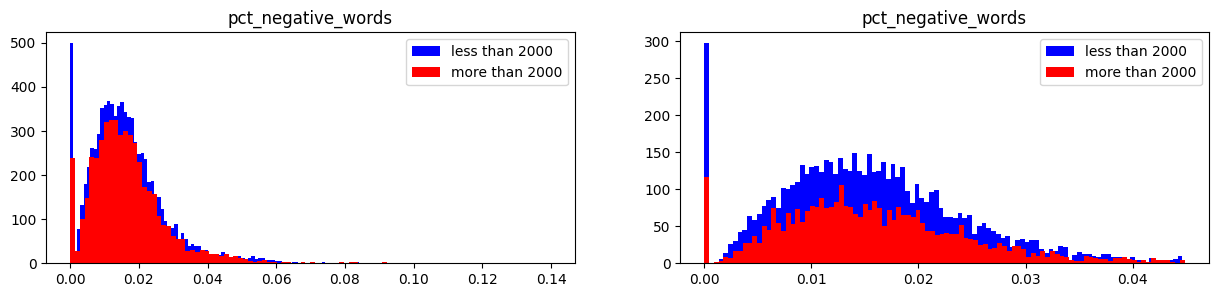

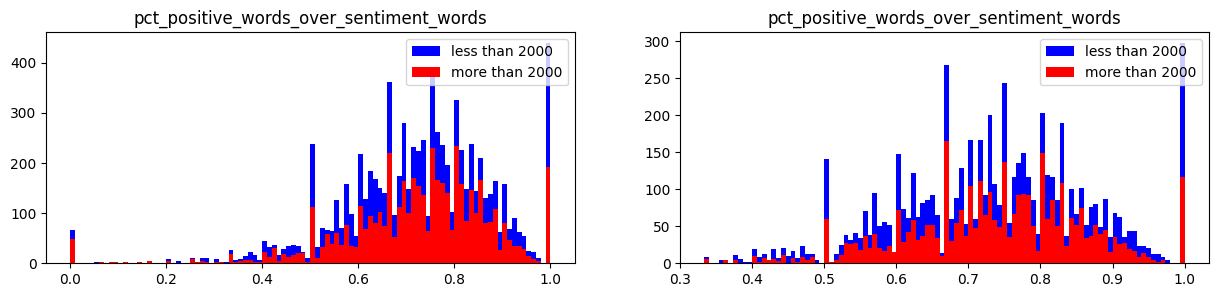

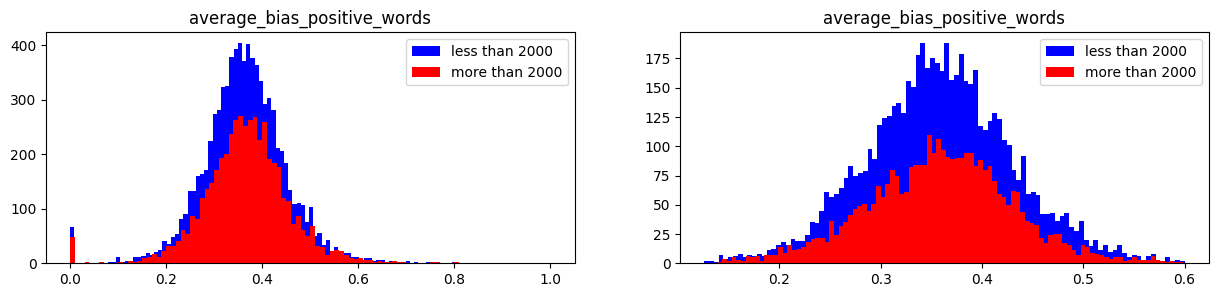

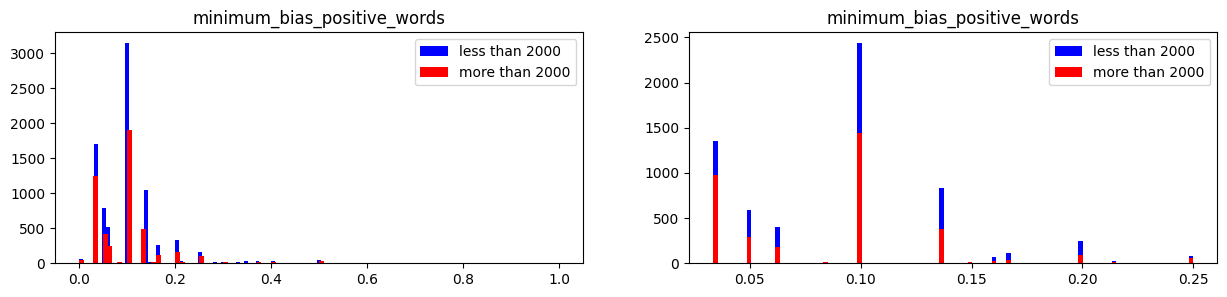

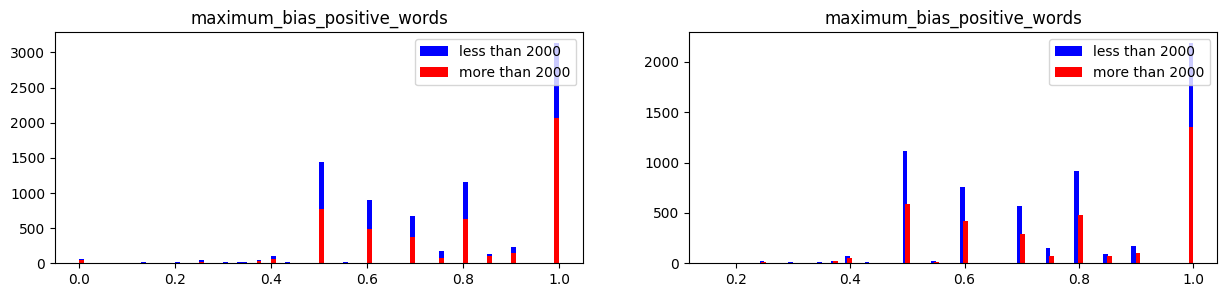

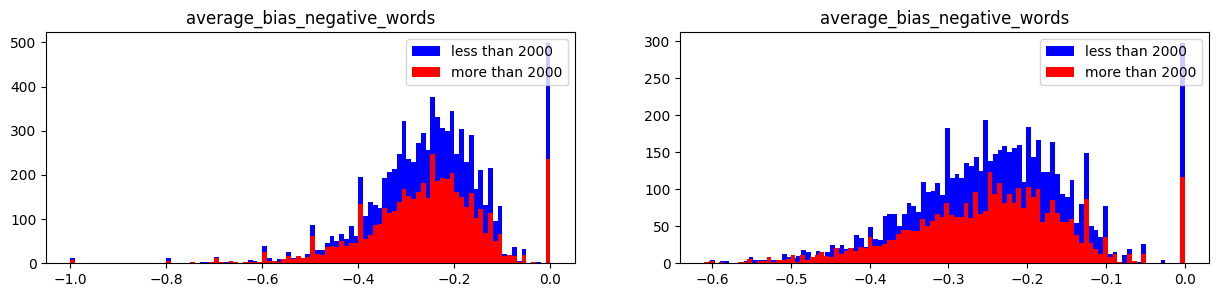

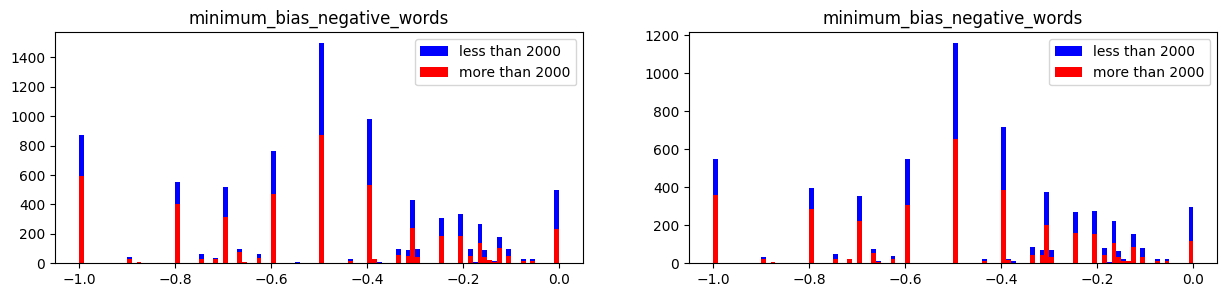

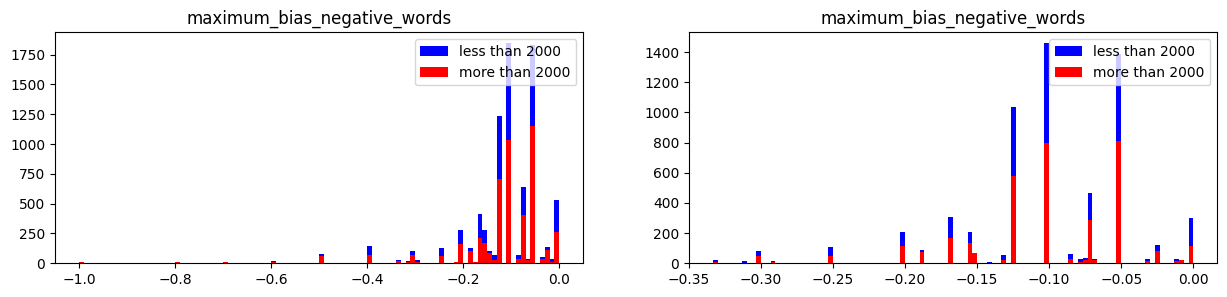

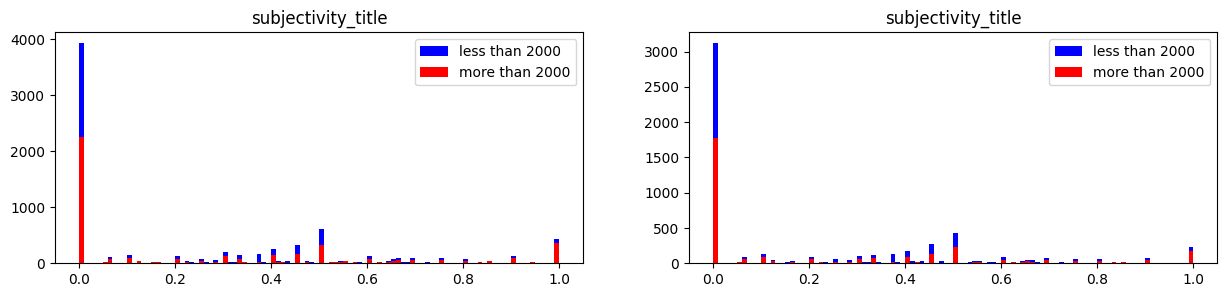

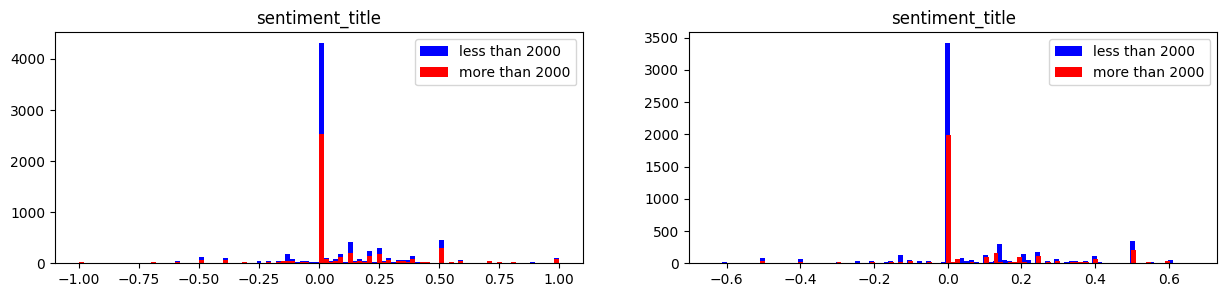

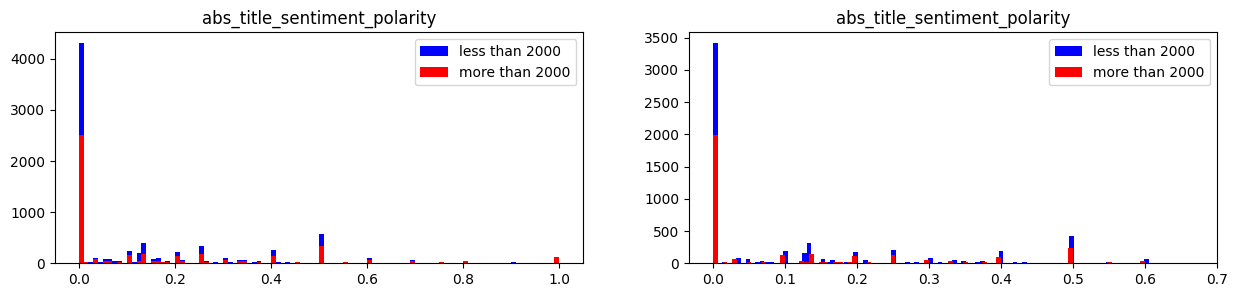

In [45]:
# Histograms for each numeric features
%matplotlib inline
# hist = df[numeric_features].hist(bins=30, sharey=True, figsize=(22, 22))
print("Comparison of the histograms for each numeric feature with and without outliers")
#create histograms for each numeric feature where the target is 0 in blue and 1 in red
for col in numeric_features:
    #create two subplots for each numeric feature
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))

    #plot the histogram for the first subplot
    ax1.hist(df.loc[df['views'] < 2000, col], bins=100, alpha=1, label='less than 2000', color='blue')
    ax1.hist(df.loc[df['views'] >= 2000, col], bins=100, alpha=1, label='more than 2000' , color='red')
    ax1.legend(loc='upper right')
    ax1.set_title(col)

    ax2.hist(df2.loc[df2['views'] < 2000, col], bins=100, alpha=1, label='less than 2000', color='blue')
    ax2.hist(df2.loc[df2['views'] >= 2000, col], bins=100, alpha=1, label='more than 2000' , color='red')
    ax2.legend(loc='upper right')
    ax2.set_title(col)
    plt.show()


### 2 - using the criteria of 2 standard deviations to get 95% of the data

In [46]:
# identify for each numeric feature the 2 std from the mean boundary and the number of outliers

df2 = df.copy()
for col in numeric_features:
    mean = df2[col].mean()
    std = df2[col].std()
    print(f"Feature {col} has a mean of {mean} and a std of {std} ")
    print(f"Values below {mean - 2*std} and above {mean + 2*std} are considered outliers ")
    print(f"Number of outliers for {col} is {df2.loc[(df2[col] < mean - 2*std) | (df2[col] > mean + 2*std), col].count()}")
    #remove outliers
    print(f"Number of rows before removing outliers is {df2.shape[0]}")
    df2 = df2.loc[(df2[col] > mean - 2*std) & (df2[col] < mean + 2*std), :]
    print(f"Number of rows after removing outliers is {df2.shape[0]} \n")

Feature days_diff has a mean of 593.4325041710905 and a std of 82.81293183026902 
Values below 427.8066405105525 and above 759.0583678316285 are considered outliers 
Number of outliers for days_diff is 0
Number of rows before removing outliers is 13186
Number of rows after removing outliers is 13186 

Feature number_words_title has a mean of 9.814879417564082 and a std of 1.9647851754353352 
Values below 5.885309066693412 and above 13.744449768434752 are considered outliers 
Number of outliers for number_words_title is 533
Number of rows before removing outliers is 13186
Number of rows after removing outliers is 12653 

Feature number_words_content has a mean of 503.6349482336205 and a std of 422.5609516864134 
Values below -341.48695513920626 and above 1348.7568516064473 are considered outliers 
Number of outliers for number_words_content is 540
Number of rows before removing outliers is 12653
Number of rows after removing outliers is 12113 

Feature number_unique_words has a mean of 

Comparison of the histograms for each numeric feature with and without outliers 2std from the mean


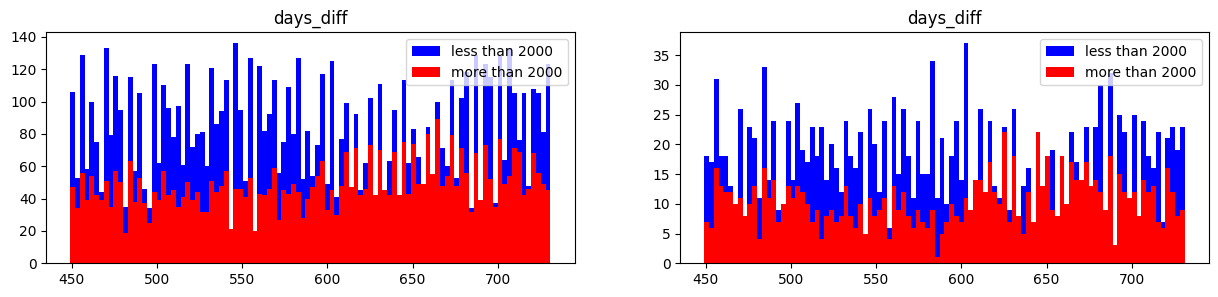

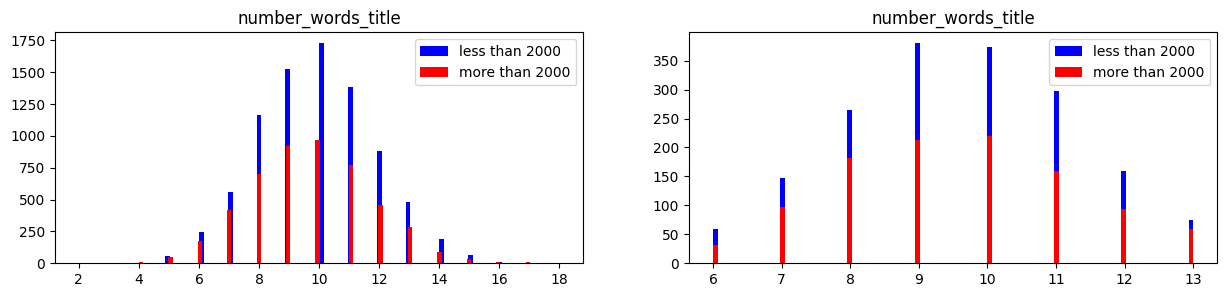

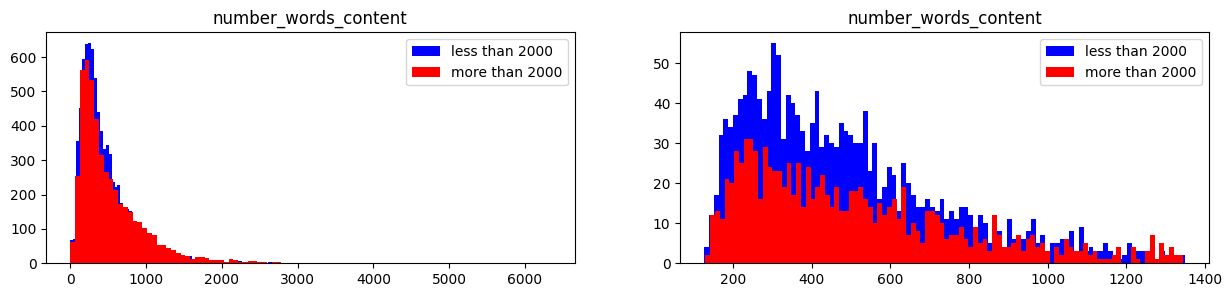

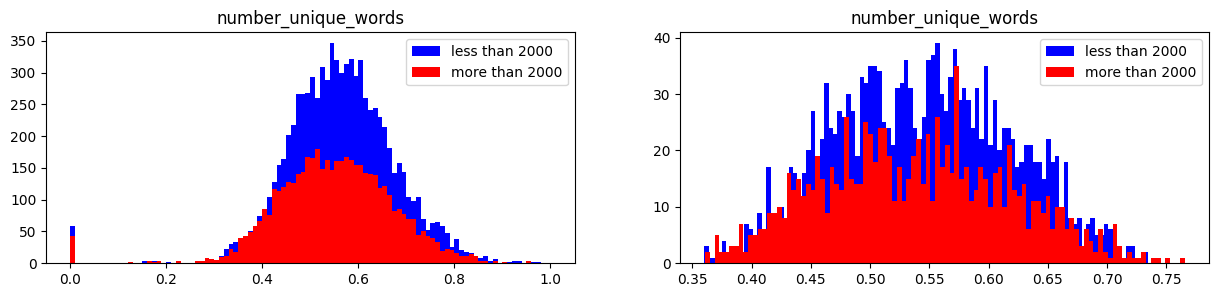

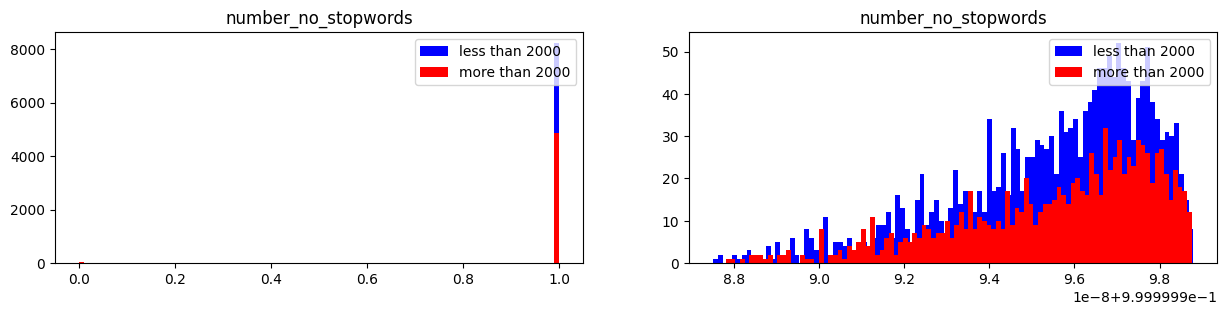

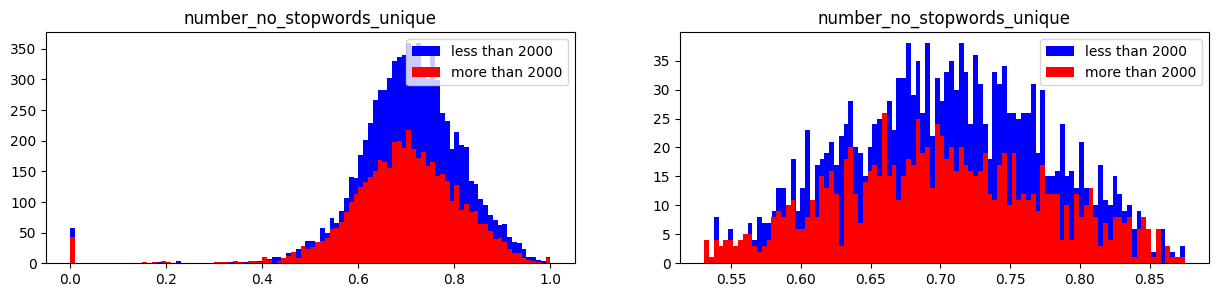

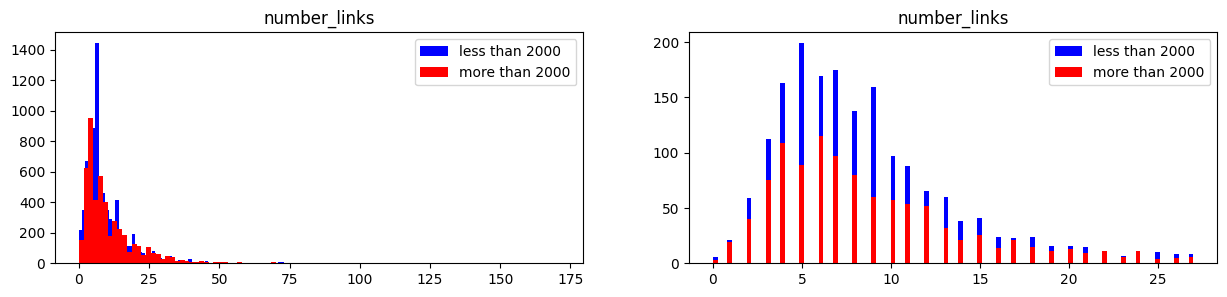

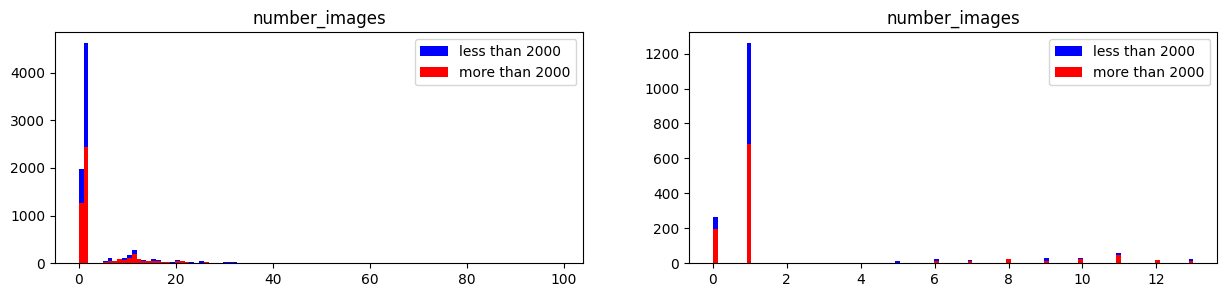

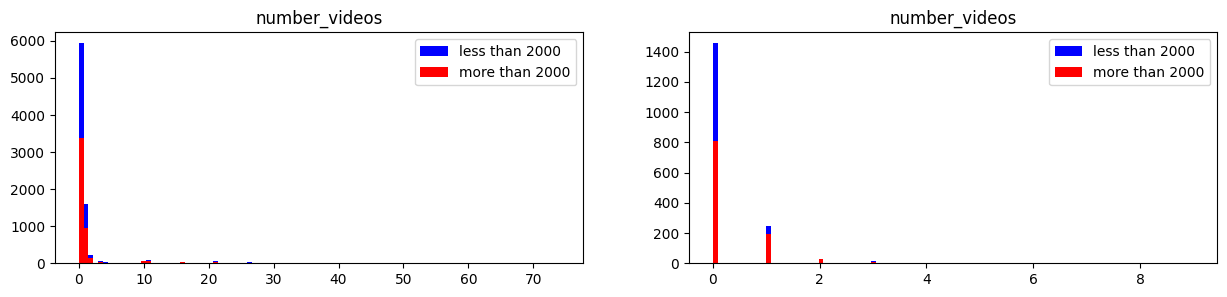

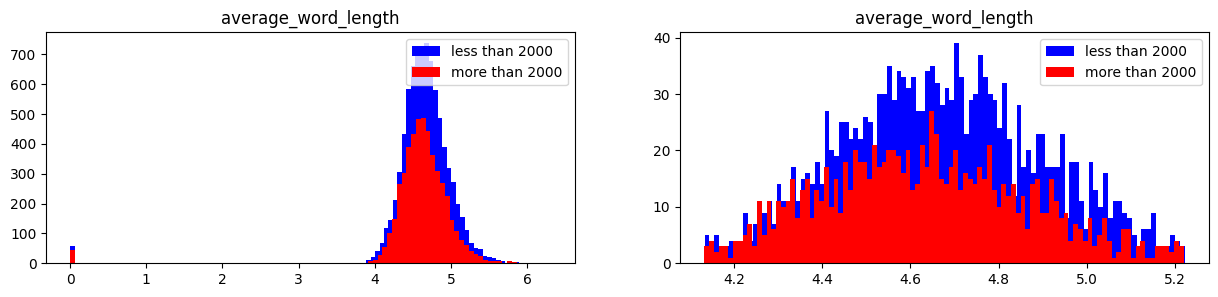

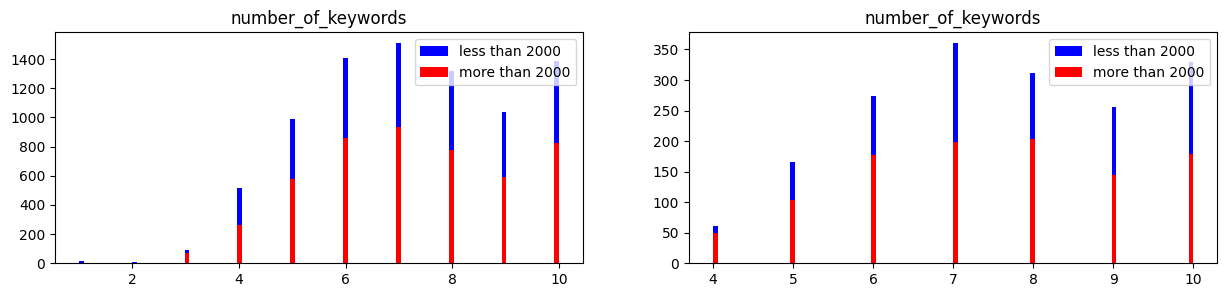

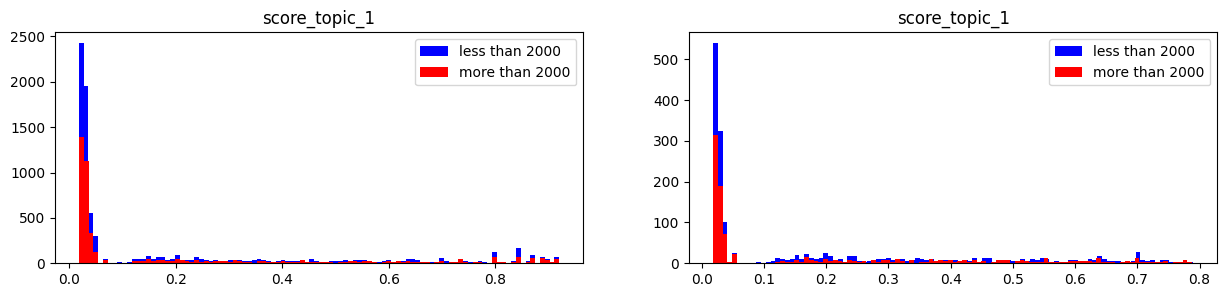

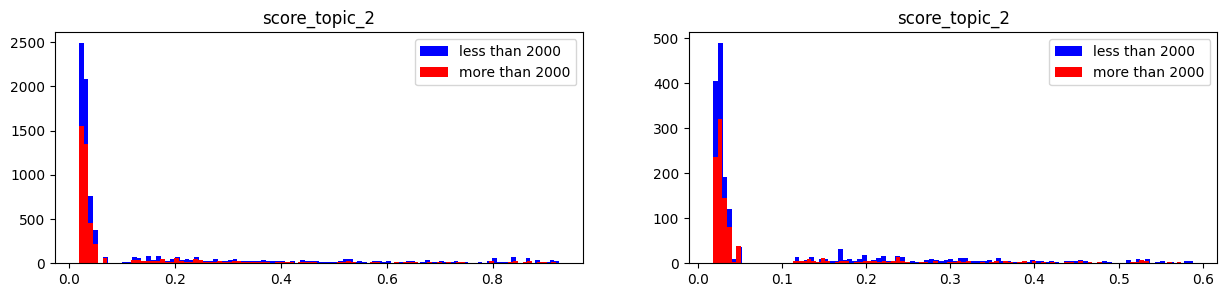

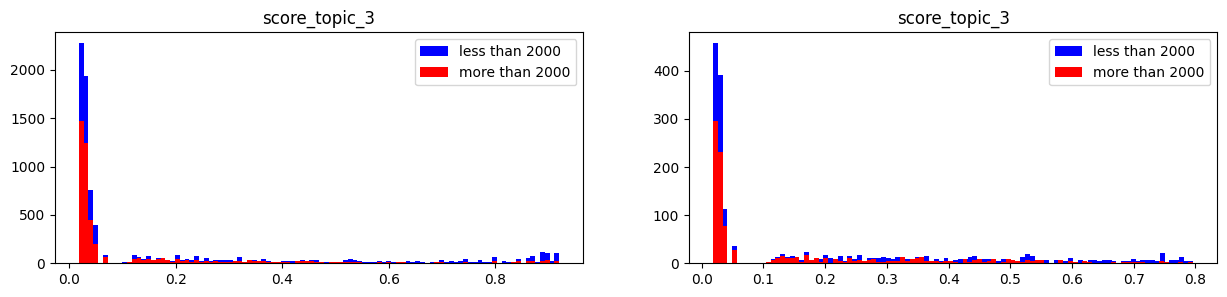

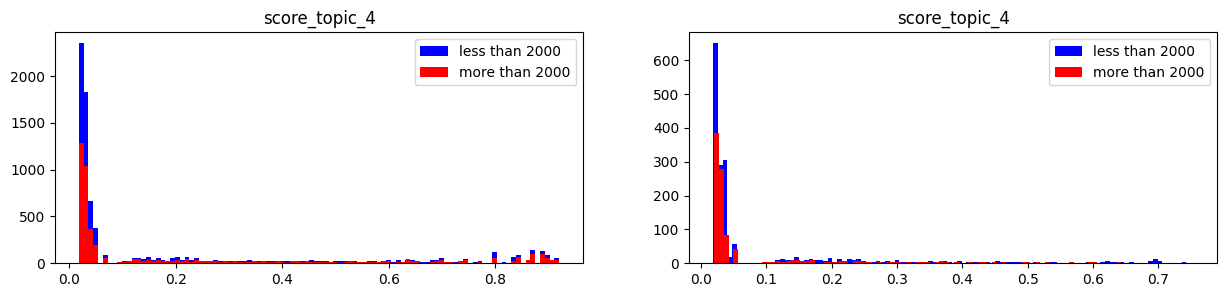

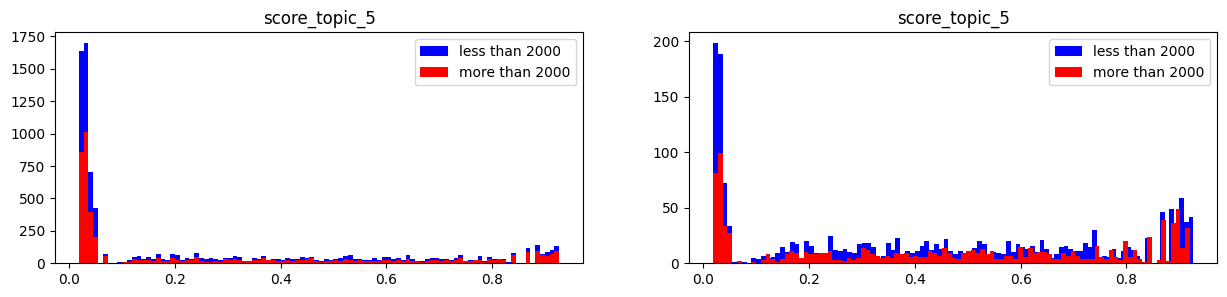

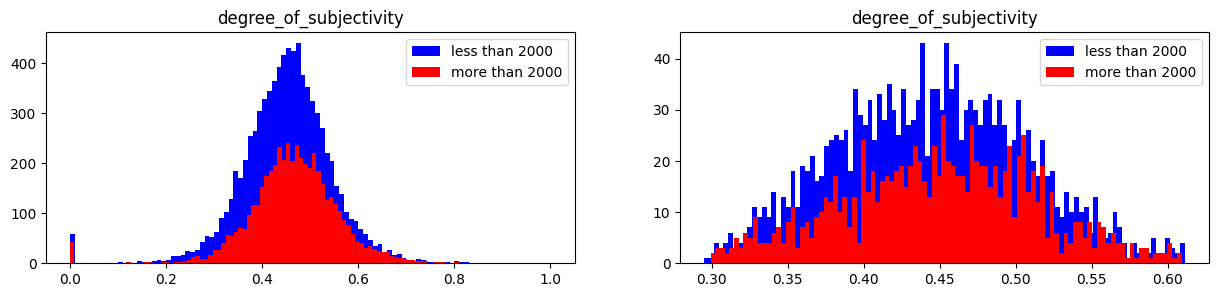

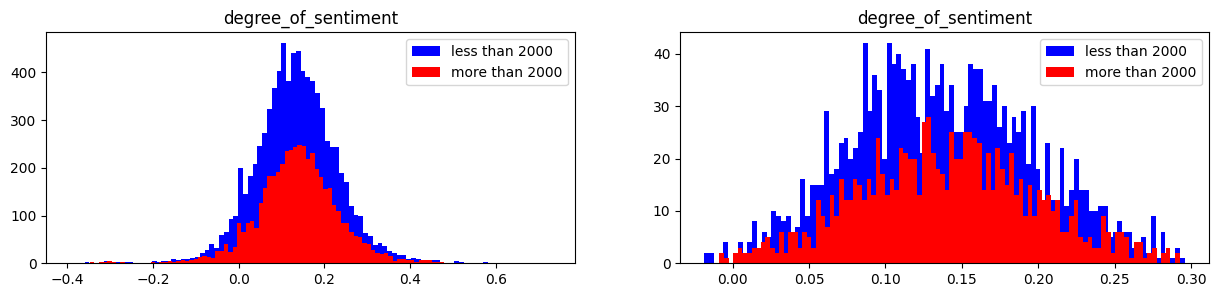

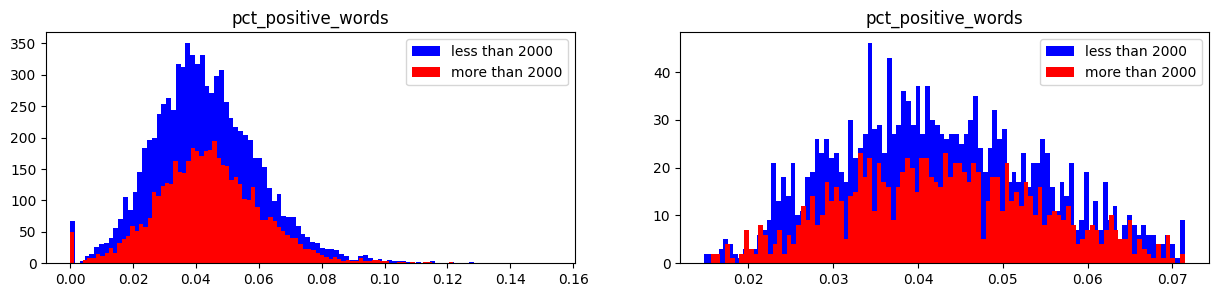

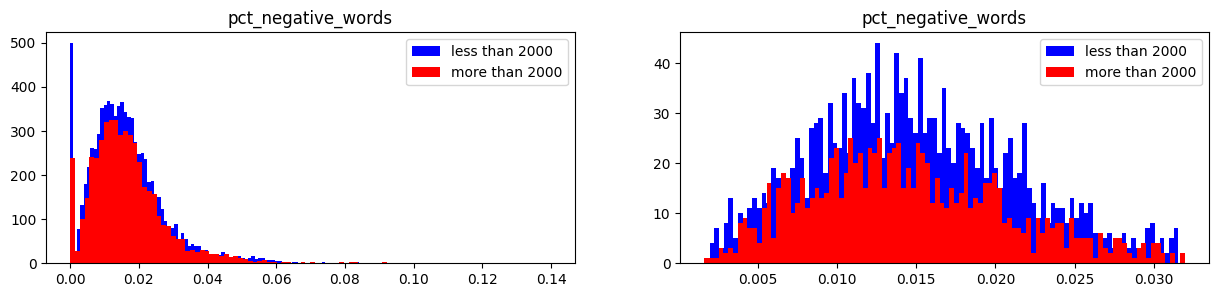

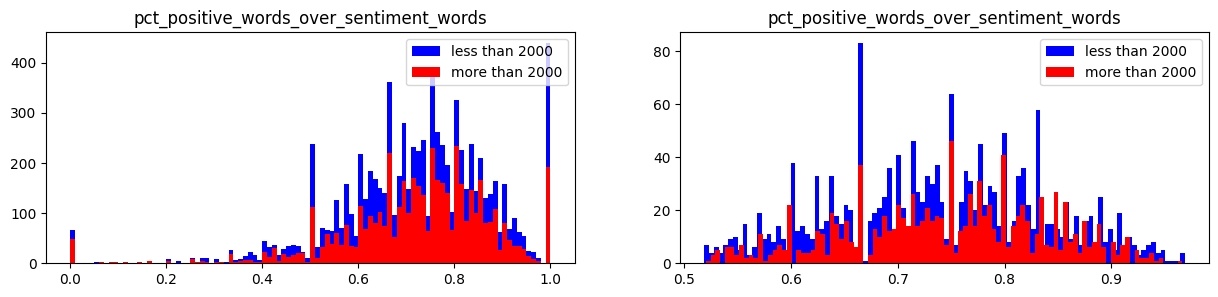

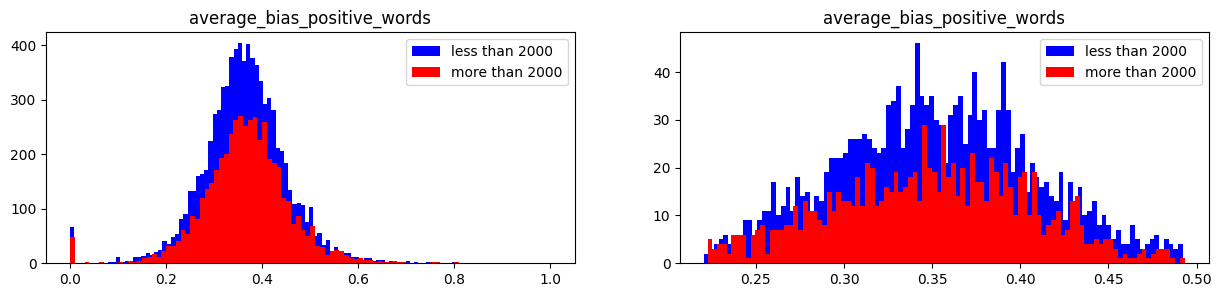

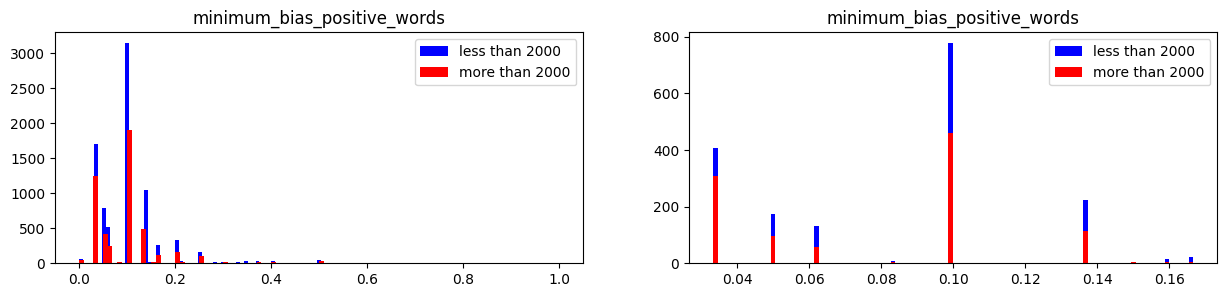

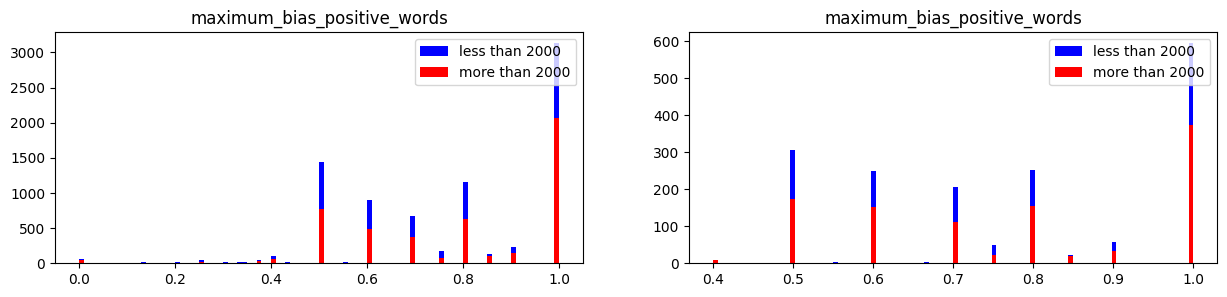

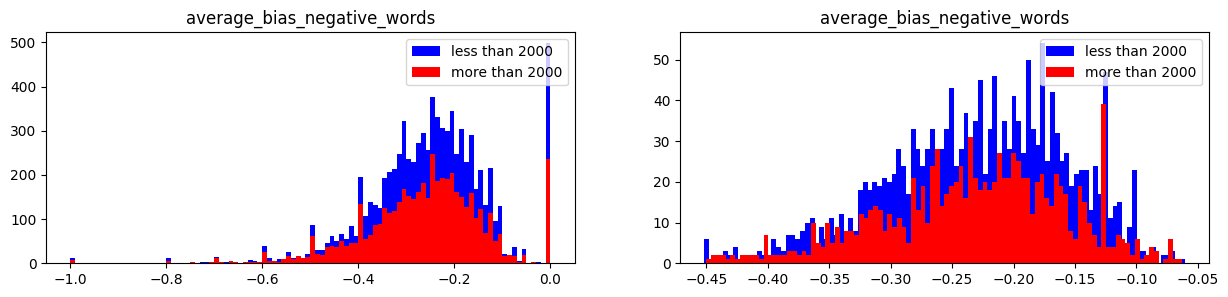

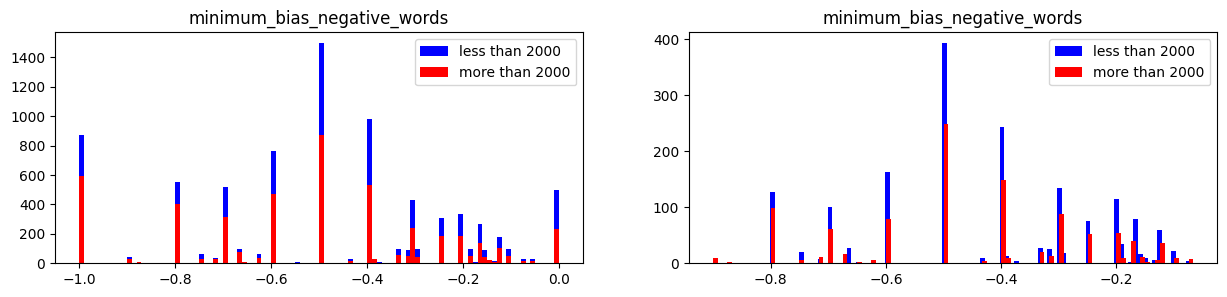

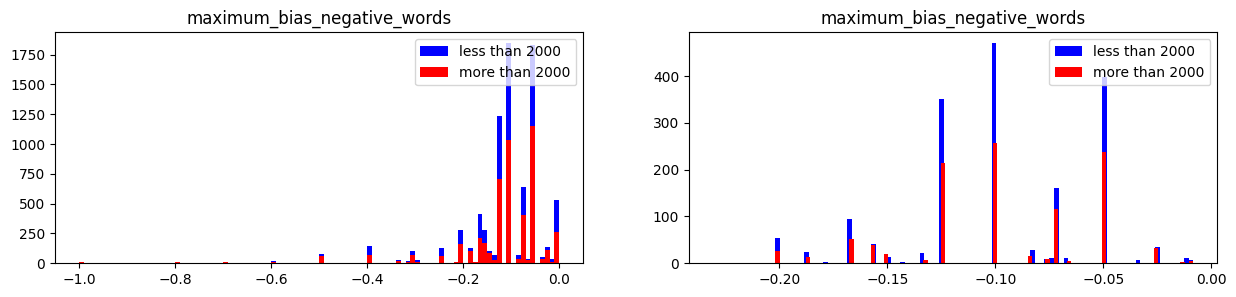

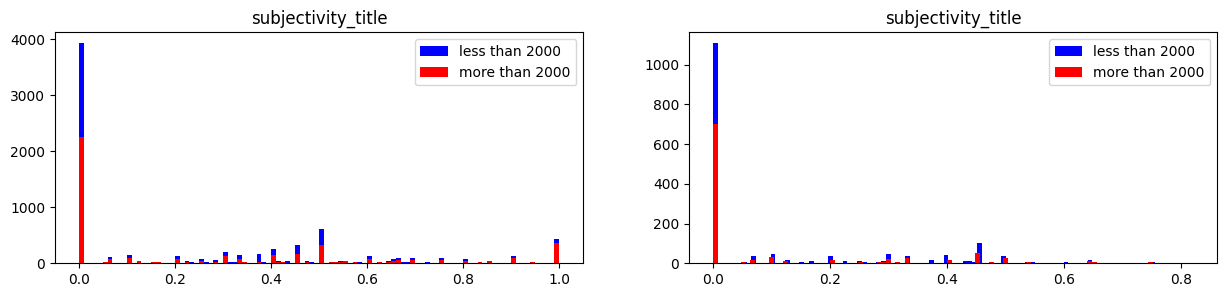

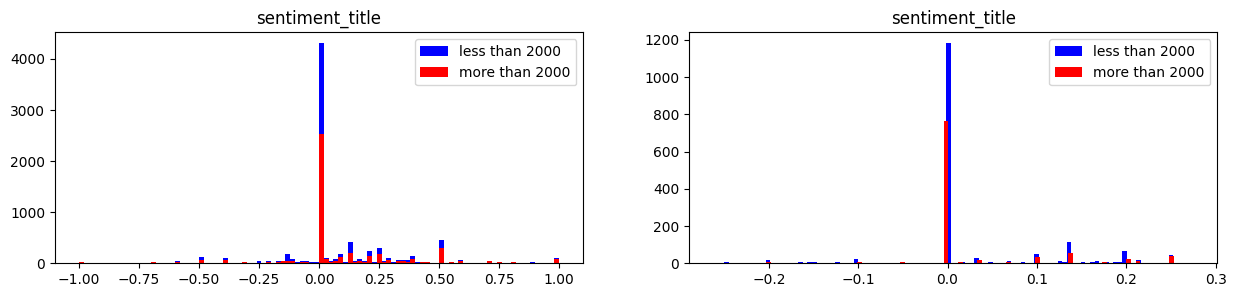

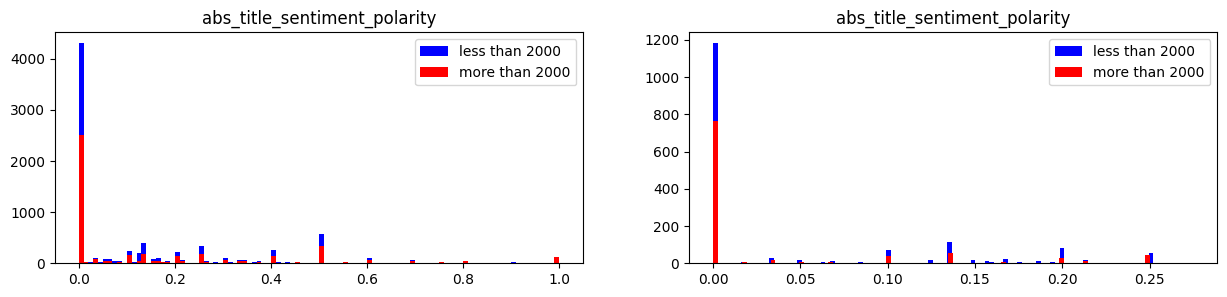

In [15]:
# Histograms for each numeric features
%matplotlib inline
# hist = df[numeric_features].hist(bins=30, sharey=True, figsize=(22, 22))
print("Comparison of the histograms for each numeric feature with and without outliers 2std from the mean")
#create histograms for each numeric feature where the target is 0 in blue and 1 in red
for col in numeric_features:
    #create two subplots for each numeric feature
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))

    #plot the histogram for the first subplot
    ax1.hist(df.loc[df['views'] < 2000, col], bins=100, alpha=1, label='less than 2000', color='blue')
    ax1.hist(df.loc[df['views'] >= 2000, col], bins=100, alpha=1, label='more than 2000' , color='red')
    ax1.legend(loc='upper right')
    ax1.set_title(col)

    ax2.hist(df2.loc[df2['views'] < 2000, col], bins=100, alpha=1, label='less than 2000', color='blue')
    ax2.hist(df2.loc[df2['views'] >= 2000, col], bins=100, alpha=1, label='more than 2000' , color='red')
    ax2.legend(loc='upper right')
    ax2.set_title(col)
    plt.show()

### Data Normalization

- Normalice the data using the MinMaxScaler method to set the data between 0 and 1.

Normalization of the numeric features


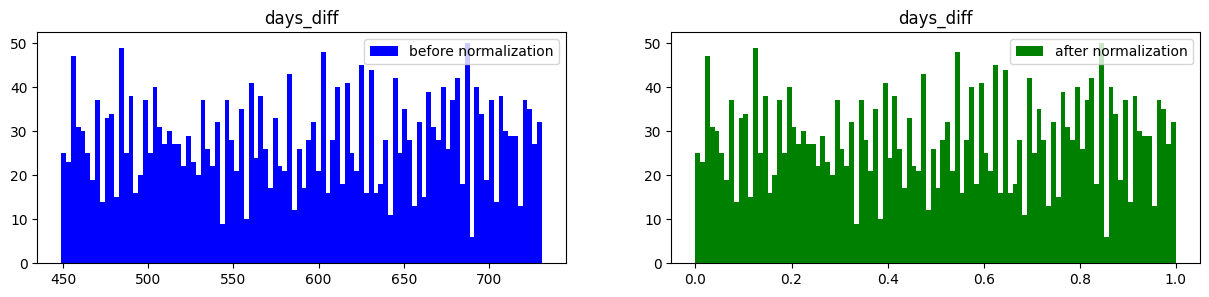

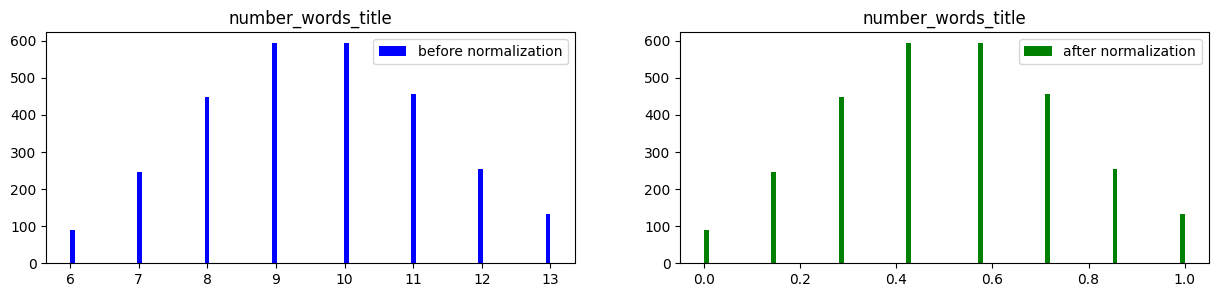

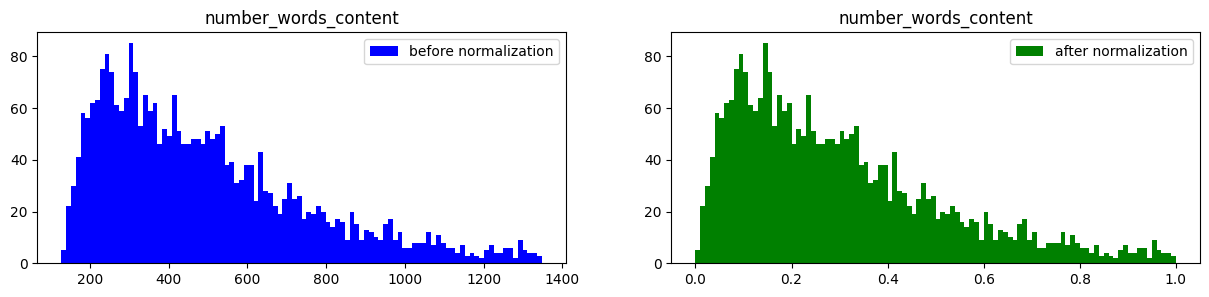

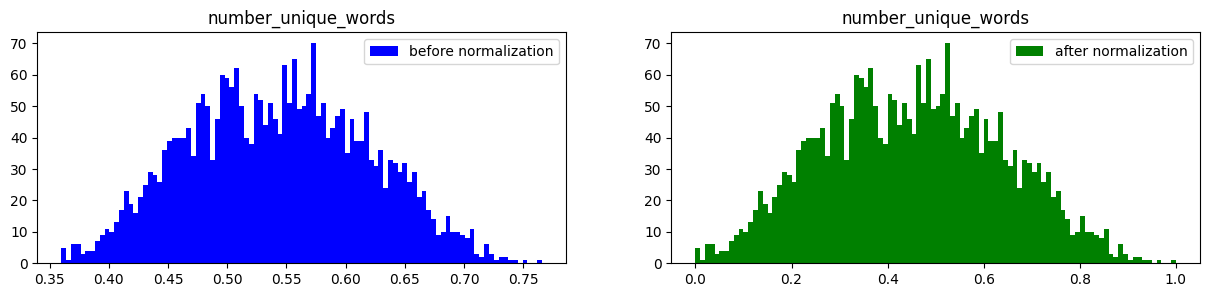

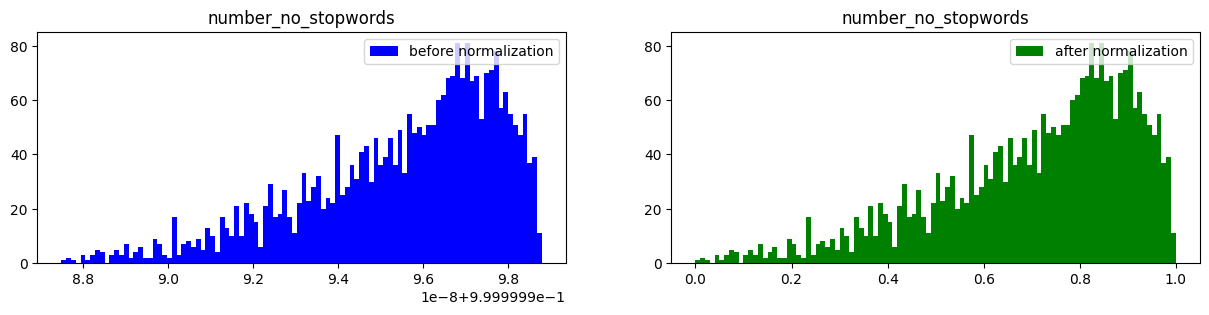

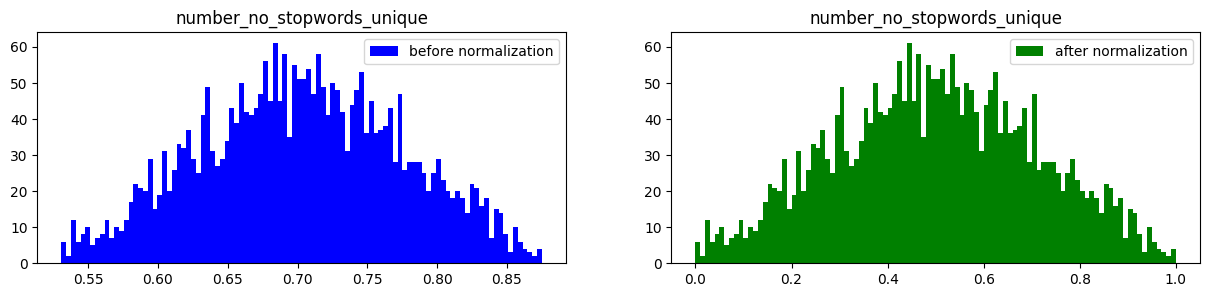

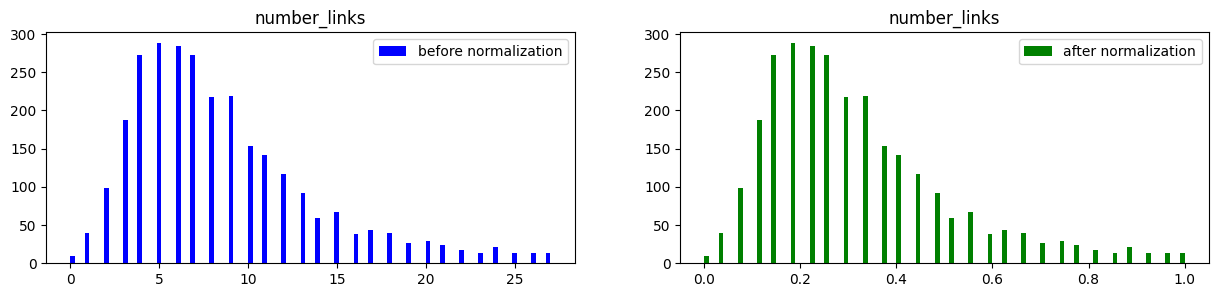

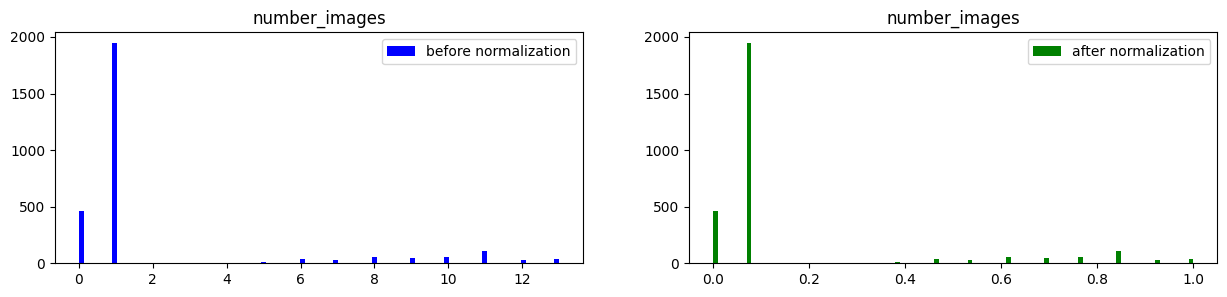

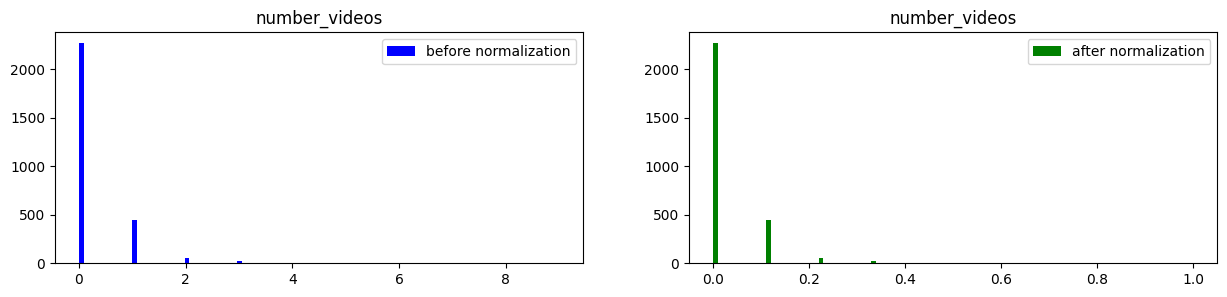

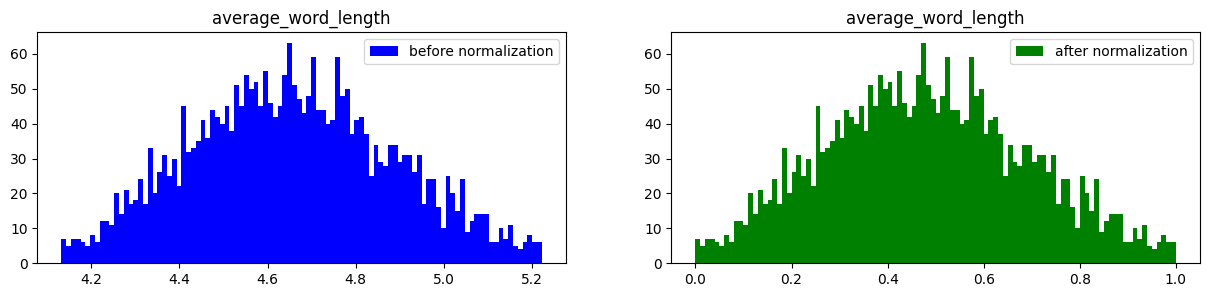

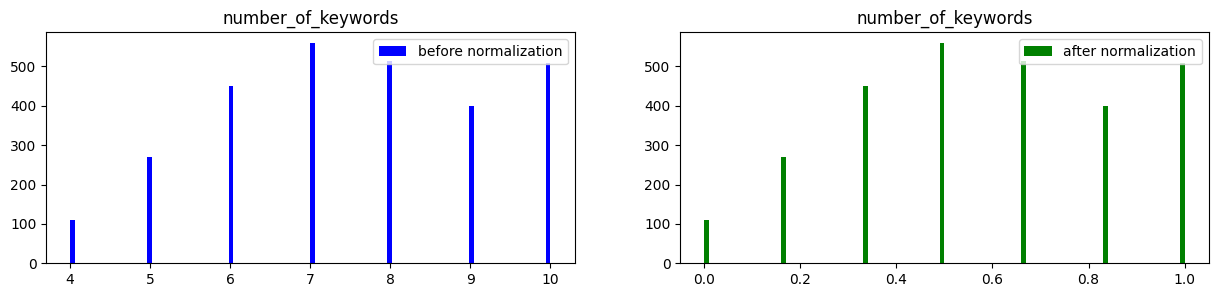

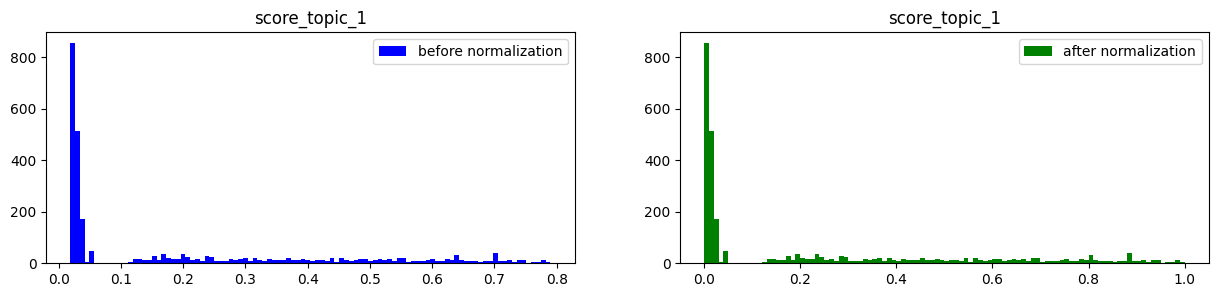

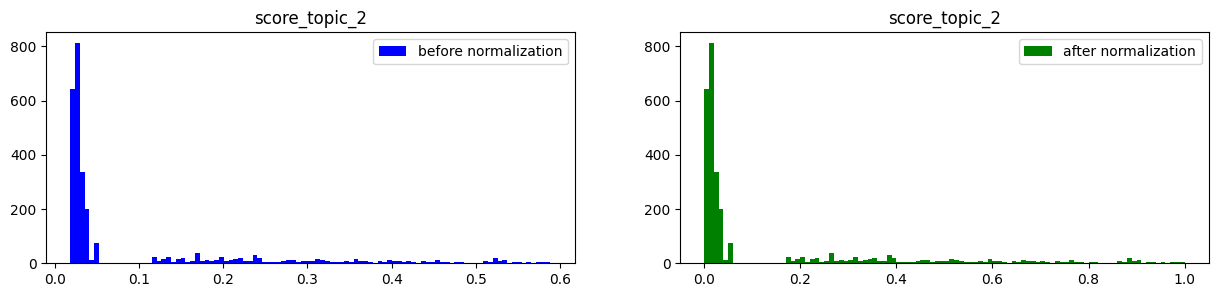

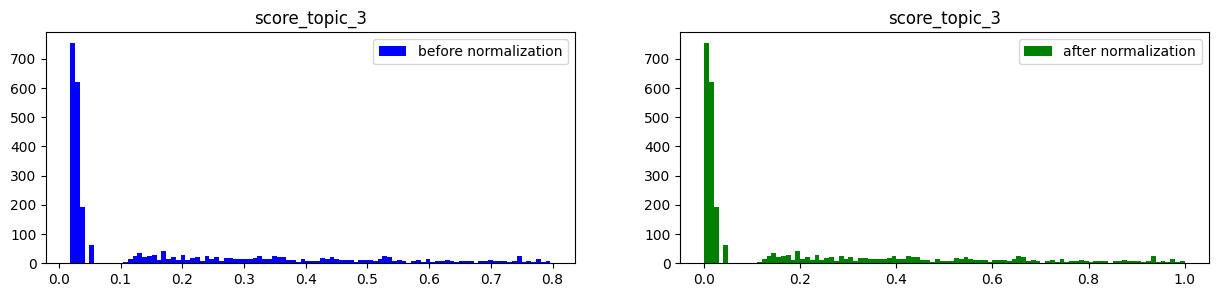

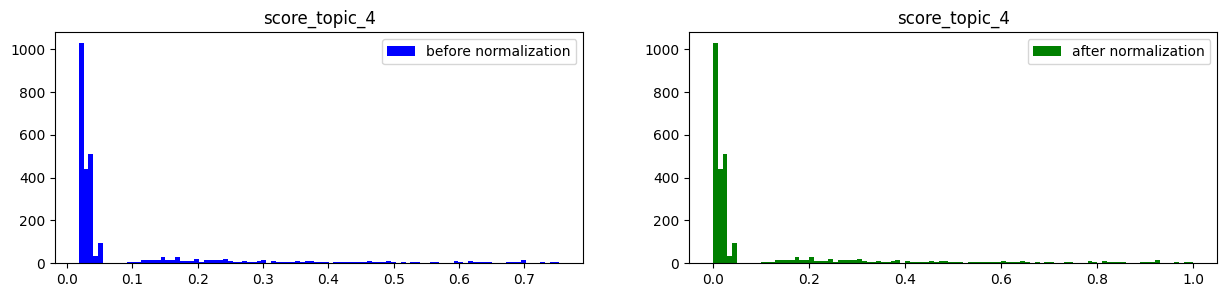

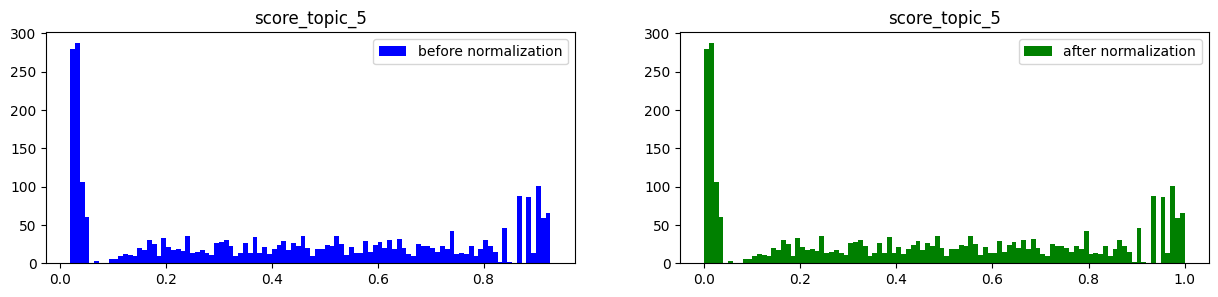

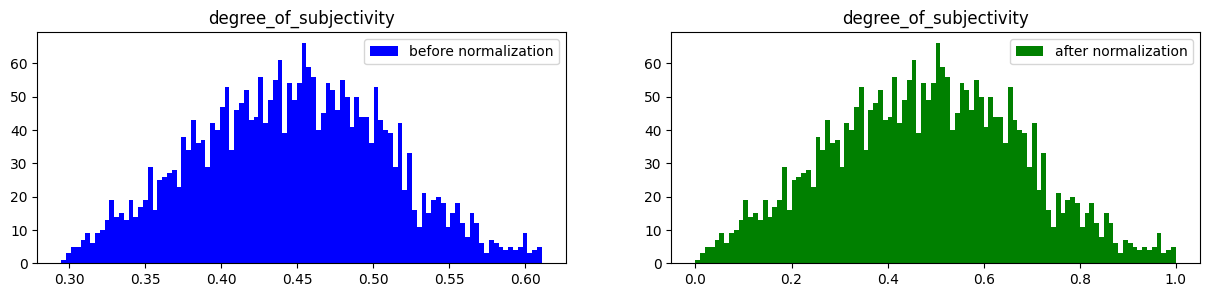

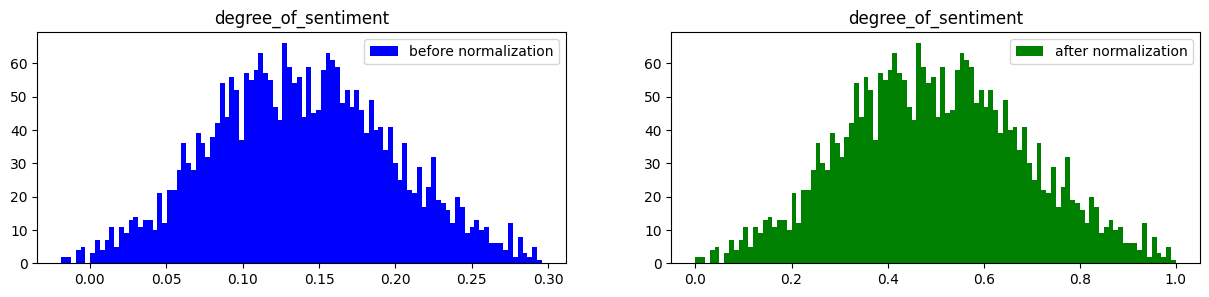

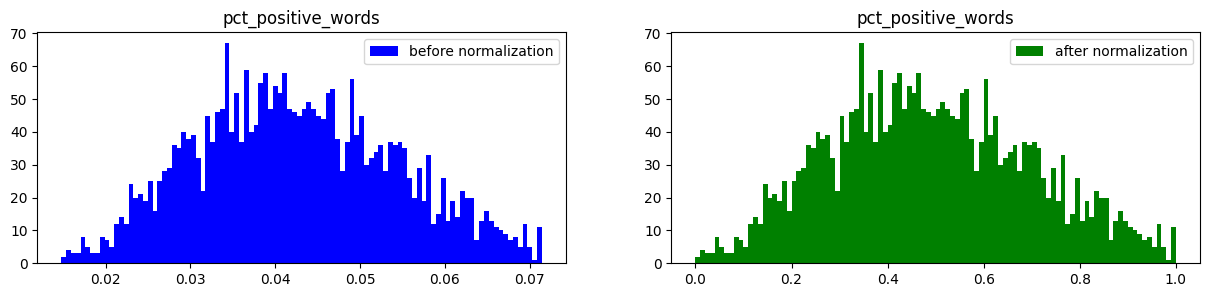

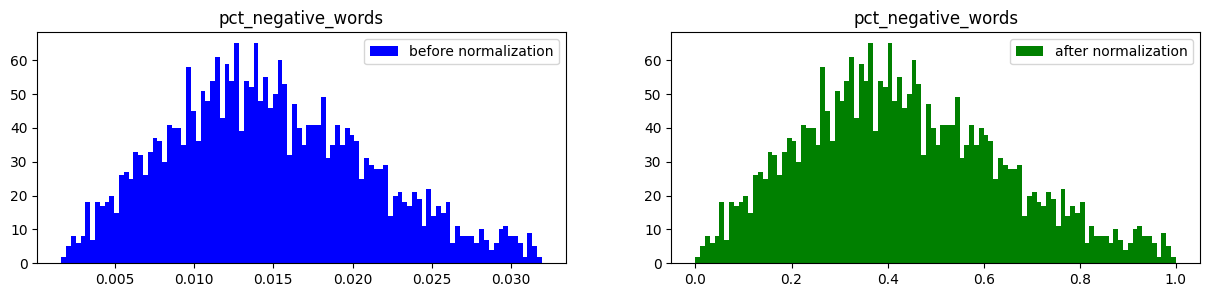

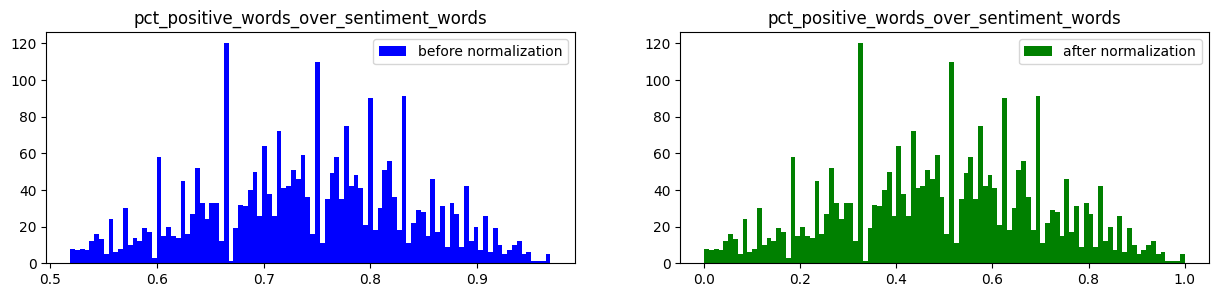

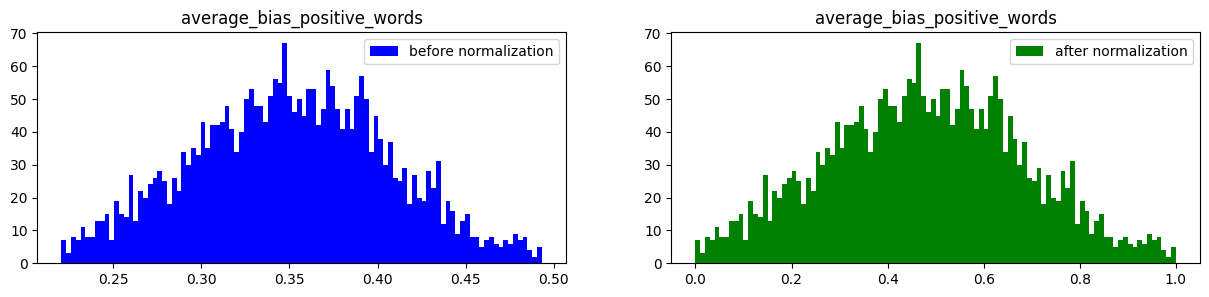

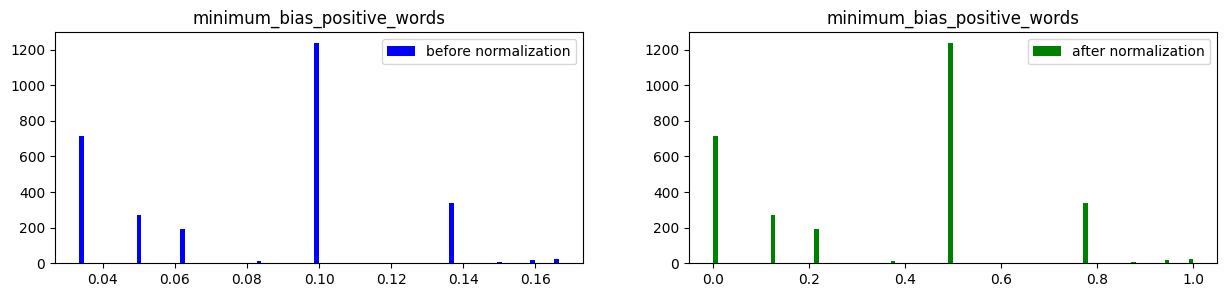

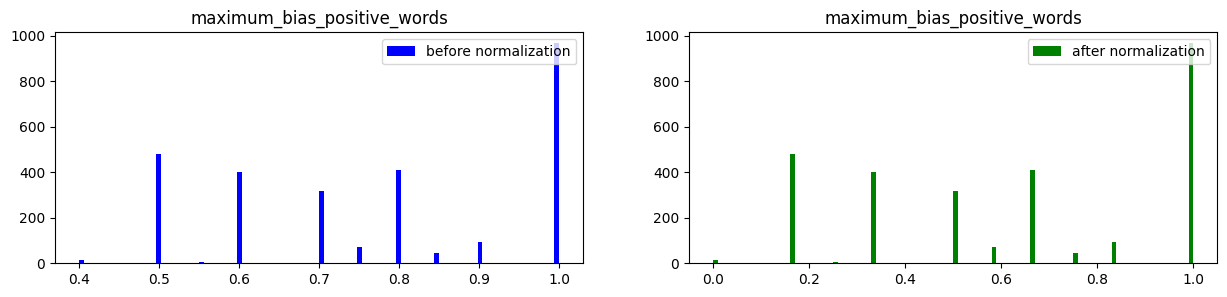

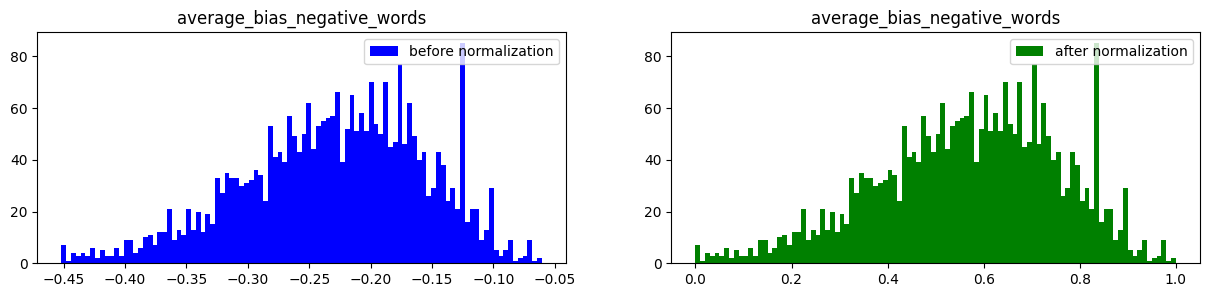

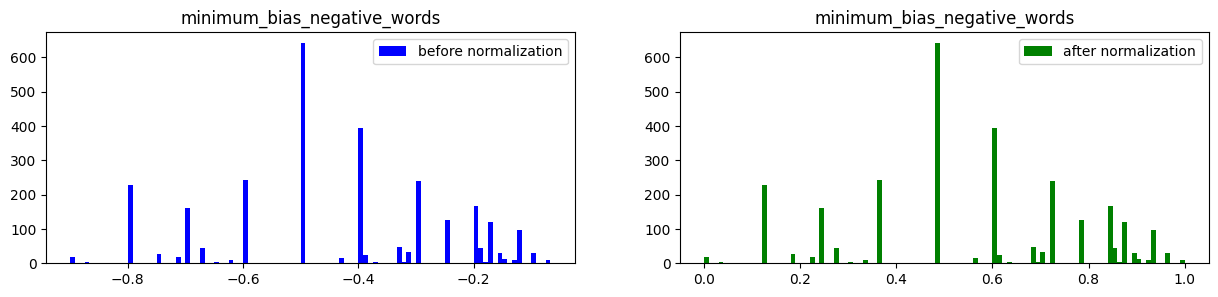

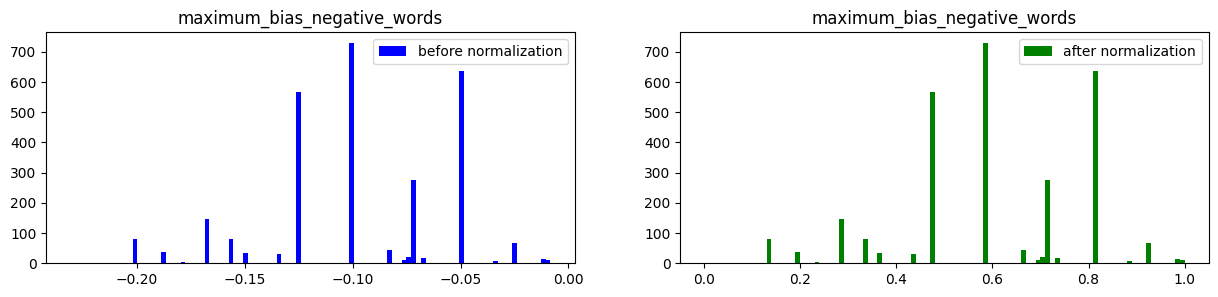

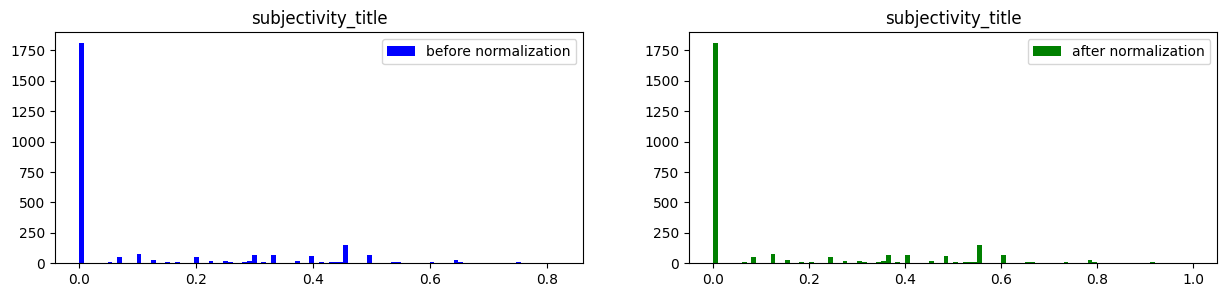

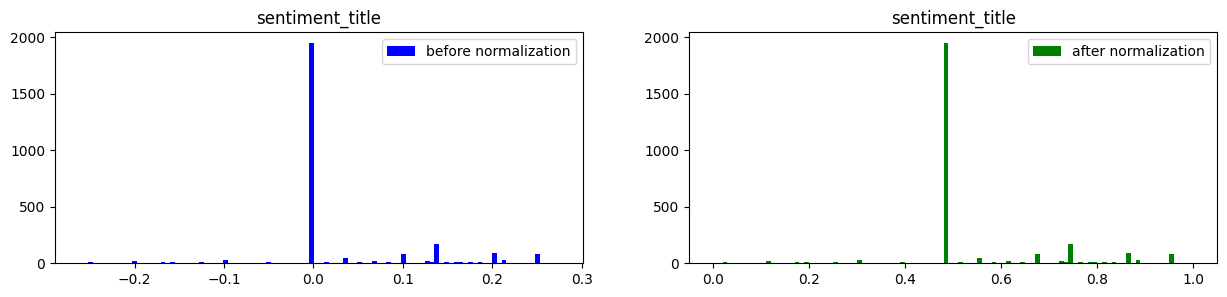

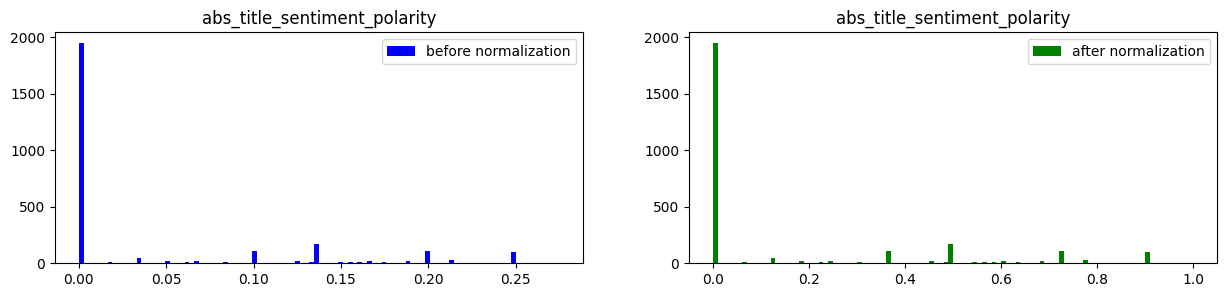

In [47]:
# for each numeric feature normalize the data
from sklearn.preprocessing import MinMaxScaler

#create a scaler and normalize the numeric features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

#funtion to normalize the numeric features and plot the histograms before and after normalization
def runNorm(df3):
    df3[numeric_features] = scaler.fit_transform(df2[numeric_features])
    print("Normalization of the numeric features")
    for col in numeric_features:
        #create two subplots for each numeric feature
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))
        #plot the histogram for the first subplot
        ax1.hist(df2[col], bins=100, alpha=1, label='before normalization', color='blue')
        ax1.legend(loc='upper right')
        ax1.set_title(col)
        #plot the boxplot for the second subplot
        ax2.hist(df3[col], bins=100, alpha=1, label='after normalization', color='green')
        ax2.legend(loc='upper right')
        ax2.set_title(col)
        plt.show()

try:
    df3 = df2.copy()
    runNorm(df3)
except:
    print("the outliers are not removed yet")



### 5 - Analyze and Preprocessing categorical variables

the categorical features are:  ['weekday', 'category']
The unique values for weekday are: ['monday' 'tuesday' 'wednesday' 'thursday' 'friday' 'saturday' 'sunday']
Number of unique values for weekday is 7
Number of missing values for weekday is 0


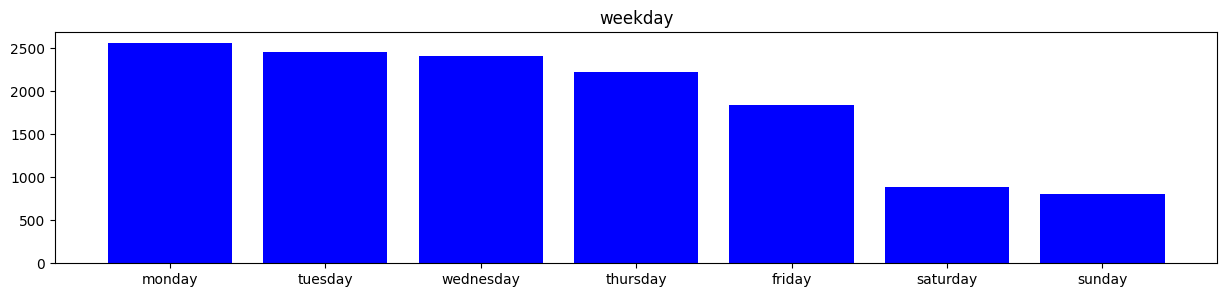

The unique values for category are: ['tech' 'world' 'bus' 'entertainment' 'other' 'lifestyle' 'socmed']
Number of unique values for category is 7
Number of missing values for category is 0


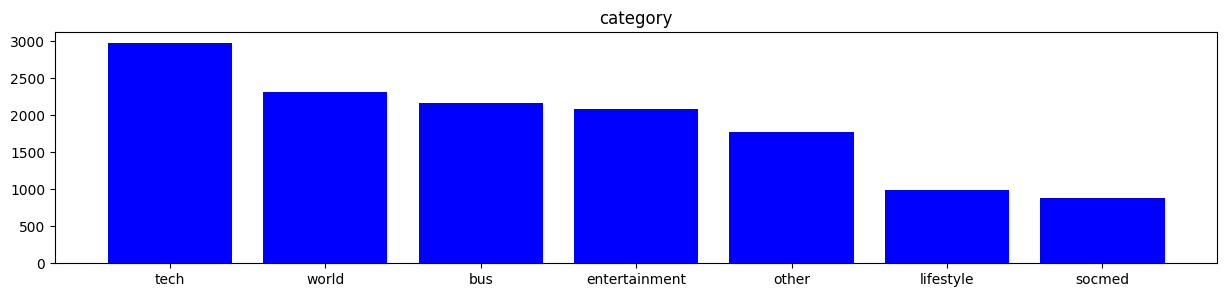

In [48]:
print("the categorical features are: ", categorical_features)

for col in categorical_features:
    print(f"The unique values for {col} are: {df[col].unique()}")
    print(f"Number of unique values for {col} is {df[col].nunique()}")
    print(f"Number of missing values for {col} is {df[col].isnull().sum()}")
    #plot the bar chart for each categorical feature
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.bar(df[col].unique(), df[col].value_counts(), color='blue')
    ax.set_title(col)
    plt.show()

In [49]:
# use one hot encoding for the categorical features and get the new column names
from sklearn.preprocessing import OneHotEncoder

# create an instance of the one hot encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# fit the one hot encoder to the categorical features
ohe.fit(df[categorical_features])

# get the new column names
new_cols = ohe.get_feature_names(categorical_features)

# transform the categorical features
df4 = pd.DataFrame(ohe.transform(df[categorical_features]), columns=new_cols)

# add the new columns to the dataframe
dataset = pd.concat([df, df4], axis=1)

# drop the original categorical features
dataset = dataset.drop(categorical_features, axis=1)

print("The new dataframe has {} rows and {} columns".format(dataset.shape[0], dataset.shape[1]))
print("The features are: ", dataset.columns)      
# check the new dataframe
feature_cols = [x for x in dataset.columns.tolist() if x not in id_cols + other_cols + [target_col]]

dataset[feature_cols].head()




The new dataframe has 13186 rows and 46 columns
The features are:  Index(['ID', 'days_diff', 'number_words_title', 'number_words_content',
       'number_unique_words', 'number_no_stopwords',
       'number_no_stopwords_unique', 'number_links', 'number_images',
       'number_videos', 'average_word_length', 'number_of_keywords',
       'score_topic_1', 'score_topic_2', 'score_topic_3', 'score_topic_4',
       'score_topic_5', 'degree_of_subjectivity', 'degree_of_sentiment',
       'pct_positive_words', 'pct_negative_words',
       'pct_positive_words_over_sentiment_words',
       'average_bias_positive_words', 'minimum_bias_positive_words',
       'maximum_bias_positive_words', 'average_bias_negative_words',
       'minimum_bias_negative_words', 'maximum_bias_negative_words',
       'subjectivity_title', 'sentiment_title', 'abs_title_sentiment_polarity',
       'views', 'weekday_friday', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


days_diff  number_words_title  number_words_content  number_unique_words  \
0        731                  11                  1089             0.418692   
1        731                  12                   682             0.459542   
2        731                   8                   397             0.624679   
3        731                   5                   356             0.618234   
4        731                   6                   174             0.691860   

   number_no_stopwords  number_no_stopwords_unique  number_links  \
0                  1.0                    0.553468            20   
1                  1.0                    0.634961            10   
2                  1.0                    0.805668            11   
3                  1.0                    0.766234             3   
4                  1.0                    0.902913             0   

   number_images  number_videos  average_word_length  ...  weekday_thursday  \
0             20              0             4.694215  ...               0.0   
1              1              0             4.620235  ...               0.0   
2              1              0             5.445844  ...               0.0   
3             12              1             4.471910  ...               0.0   
4              1              0             4.798851  ...               0.0   

   weekday_tuesday  weekday_wednesday  category_bus  category_entertainment  \
0              0.0                0.0           0.0                     0.0   
1              0.0                0.0           0.0                     0.0   
2              0.0                0.0           1.0                     0.0   
3              0.0                0.0           0.0                     1.0   
4              0.0                0.0           0.0                     0.0   

   category_lifestyle  category_other  category_socmed  category_tech  \
0                 0.0             0.0              0.0            1.0   
1                 0.0             0.0              0.0            0.0   
2                 0.0             0.0              0.0            0.0   
3                 0.0             0.0              0.0            0.0   
4                 0.0             0.0              0.0            1.0   

   category_world  
0             0.0  
1             1.0  
2             0.0  
3             0.0  
4             0.0  

[5 rows x 44 columns]


### 6 - Analyze and Preprocessing the target variable

1 - Binarize target variable, 1 if more than 2000 visits, 0 otherwise.

2 - Verificamos la proporción de los datos de la variable objetivo, para ver si se trata de un problema de clasificación balanceado o desbalanceado.


In [50]:
#use the data from the previous step
try:
    df = dataset.copy()
except:
    print("Please run the previous steps first")

# binarize target column
if df[target_col].unique().shape[0] > 2:
    df[target_col] = df[target_col].apply(lambda x: 1 if x > 2000 else 0)
else:
    pass

# check target column proportion
print("Description of the target column: \n")
print(df[target_col].value_counts(normalize=True))


Description of the target column: 

0    0.647277
1    0.352723
Name: views, dtype: float64



- Verificamos visualmente la distribución de la variable objetivo.

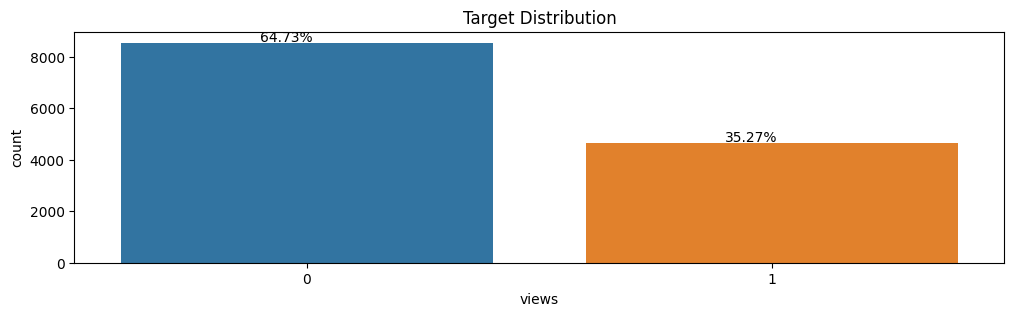

In [51]:
#plot of the target column

plt.figure(figsize=(12,3))
ax = sns.countplot(x=target_col, data=df)
plt.title('Target Distribution')
# add annotations 
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.3, p.get_height()+50))

plt.show()

### Now check the correlation between the variables of the dataset

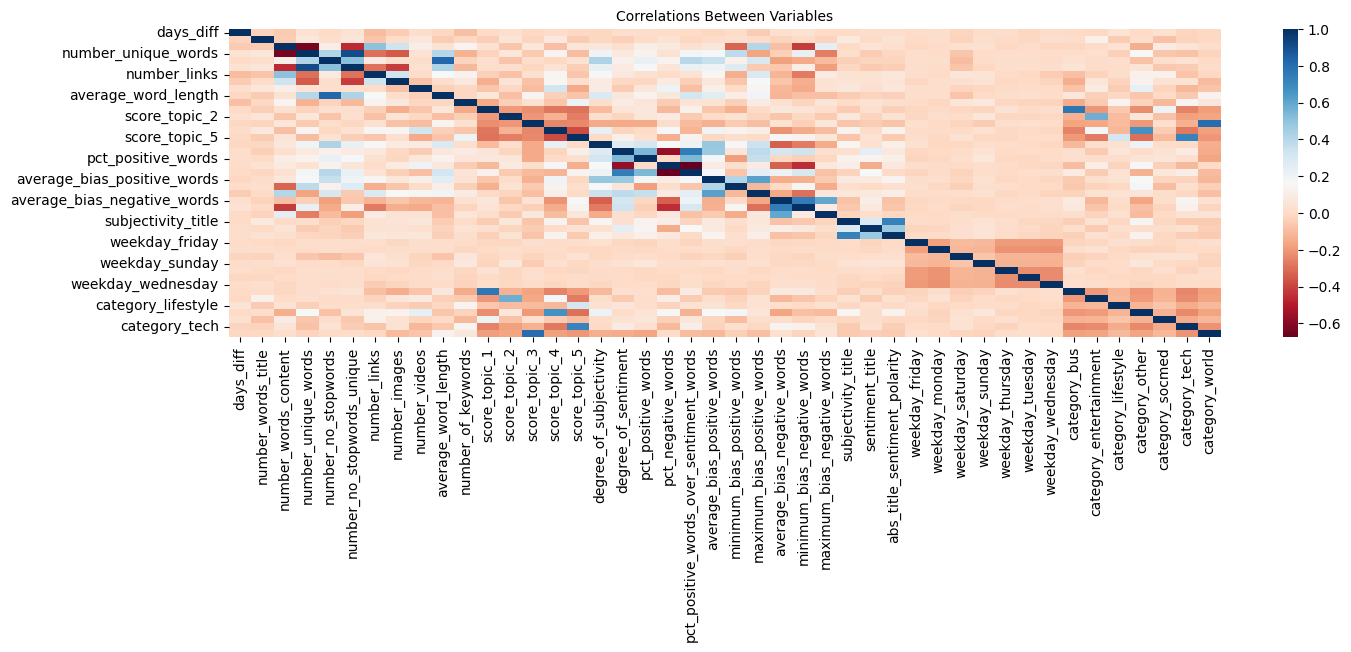

In [21]:
#check the correlation between the variables

plt.figure(figsize=(16,4))
sns.heatmap(df[feature_cols].corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=10)
plt.show()

### 7 - Feature Selection

1 - Numeric variables

2 - Categorical variables

### 1 - Numeric variables

In [70]:
numeric_features

target_col = 'views'

X = df.drop(target_col, axis=1)
y = df[target_col]

- Analizamos la correlación entre las variables numericas del dataset, para ver si hay variables que estén altamente correlacionadas, y por lo tanto se puedan eliminar.

In [71]:
# analyze the correlation between the features to remove the features with high correlation
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')


In [72]:
# remove the features with high correlation
# create a correlation matrix
corr_matrix = X.corr().abs()
corr_matrix

# # select upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# print the features to drop
print("The features to drop are: ", to_drop)

#the new numeric features are
numeric_features = [x for x in numeric_features if x not in to_drop]

# # drop the features 
X = X.drop(X[to_drop], axis=1)

print("The new dataframe has {} rows and {} columns".format(X.shape[0], X.shape[1]))


The features to drop are:  ['days_diff']
The new dataframe has 13186 rows and 44 columns


/var/folders/1r/tqvbnqps6gvcskw5f6vvlk2h0000gq/T/ipykernel_10557/2316959012.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


<AxesSubplot: >

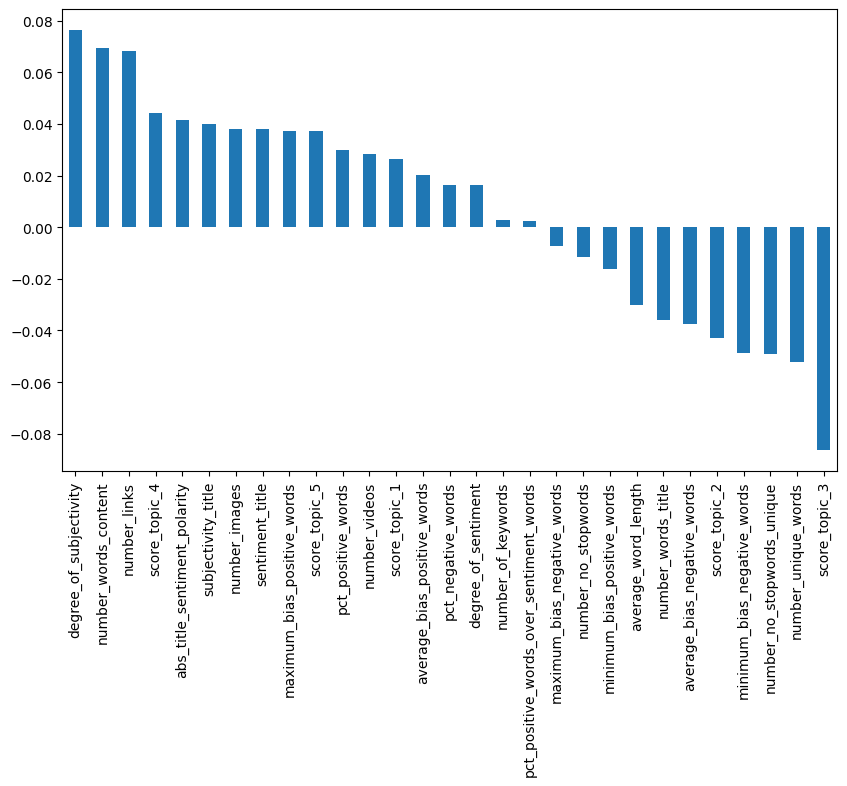

In [73]:
#calculate the correlation between the features and the target column

correlations = df[numeric_features + [target_col]].corr()[target_col][:-1].sort_values(ascending=False)

#plot the correlations from highest to lowest

correlations.plot.bar(figsize=(10, 6))

<AxesSubplot: >

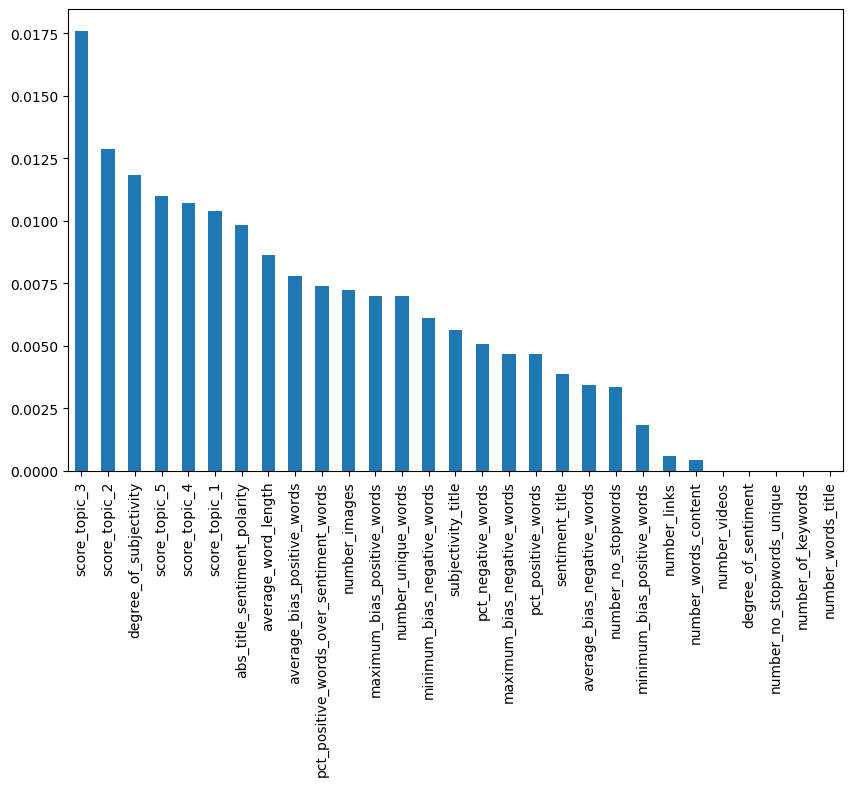

In [74]:
### Feature Selection

from sklearn.feature_selection import mutual_info_classif

# calculate mutual information

mi = mutual_info_classif(X[numeric_features], y)

#plot the mutual information from highest to lowest

mi = pd.Series(mi)
mi.index = X[numeric_features].columns
mi.sort_values(ascending=False, inplace=True)
mi.plot.bar(figsize=(10, 6))

In [125]:
#select the features with more than 0.001 mutual information

selected_features = mi[mi > 0.001].index
selected_features.value_counts().sum()

print(f"the numeric features after feature selection are {len(numeric_features)} and then number of features is {len(selected_features)}")

no_importance_features = [x for x in numeric_features if x not in selected_features]

print(f"the numeric features with no importance are {no_importance_features}")



the numeric features after feature selection are 29 and then number of features is 22
the numeric features with no importance are ['number_words_title', 'number_words_content', 'number_no_stopwords_unique', 'number_links', 'number_videos', 'number_of_keywords', 'degree_of_sentiment']


### 2 - Categorical variables

In [99]:
categorical_features

new_cols.tolist()


['weekday_friday',
 'weekday_monday',
 'weekday_saturday',
 'weekday_sunday',
 'weekday_thursday',
 'weekday_tuesday',
 'weekday_wednesday',
 'category_bus',
 'category_entertainment',
 'category_lifestyle',
 'category_other',
 'category_socmed',
 'category_tech',
 'category_world']

In [130]:
#split the data into train and test sets

from sklearn.model_selection import train_test_split

#total_features = selected_features.tolist() + new_cols.tolist()   #0.666
#total_features = selected_features.tolist()                       #0.661  #22 features
total_features = numeric_features + new_cols.tolist()             #0.669
#total_features = numeric_features                                 #0.662
print(total_features)

X_train, X_test, y_train, y_test = train_test_split(df[total_features], y, test_size=0.2, random_state=0)

print("The shape of the train set is: ", X_train.shape)
print("The shape of the test set is: ", X_test.shape)

['number_words_title', 'number_words_content', 'number_unique_words', 'number_no_stopwords', 'number_no_stopwords_unique', 'number_links', 'number_images', 'number_videos', 'average_word_length', 'number_of_keywords', 'score_topic_1', 'score_topic_2', 'score_topic_3', 'score_topic_4', 'score_topic_5', 'degree_of_subjectivity', 'degree_of_sentiment', 'pct_positive_words', 'pct_negative_words', 'pct_positive_words_over_sentiment_words', 'average_bias_positive_words', 'minimum_bias_positive_words', 'maximum_bias_positive_words', 'average_bias_negative_words', 'minimum_bias_negative_words', 'maximum_bias_negative_words', 'subjectivity_title', 'sentiment_title', 'abs_title_sentiment_polarity', 'weekday_friday', 'weekday_monday', 'weekday_saturday', 'weekday_sunday', 'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday', 'category_bus', 'category_entertainment', 'category_lifestyle', 'category_other', 'category_socmed', 'category_tech', 'category_world']
The shape of the train set is:  

In [131]:
#random forest model

from sklearn.ensemble import RandomForestClassifier

# create an instance of the random forest classifier
rf = RandomForestClassifier()

# cross validate the model
from sklearn.model_selection import cross_val_score

# calculate the cross validation score

cv_score = cross_val_score(rf, X_train, y_train, cv=5)

print("The cross validation scores are: ", cv_score)

print("The cross validation score is: ", cv_score.mean())


The cross validation scores are:  [0.66635071 0.67345972 0.66824645 0.67899478 0.66192508]
The cross validation score is:  0.6697953478547143


### 8 - Save the preprocessed dataset

In [23]:
#save the dataframe to a csv file
#drop ID column
df = df.drop(id_cols, axis=1)
df.to_csv('../src/data/processed/dataset.csv', index=False)